# Pandas for dubai_data (real estate analisys)


# Preparing the dataset

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [4]:
# %matplotlib inline

In [5]:
plt.rcParams["figure.figsize"] = (10, 5)


In [6]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


In [7]:

if os.path.isfile("dubai_data"):
    filepath = "dubai_data"
    print("loading from file")
else:
    filepath = "https://www.dubaipulse.gov.ae/data/dld-transactions/dld_transactions-open#"
    print("loading from the internet")

dubai_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [8]:
dubai_data.head()



transaction_id  procedure_id  trans_group_id trans_group_ar  \
0    1-11-2004-2099            11               1        مبايعات   
1    1-11-2011-6898            11               1        مبايعات   
2  1-11-2008-203212            11               1        مبايعات   
3   1-11-2010-15769            11               1        مبايعات   
4    1-110-2010-557           110               1        مبايعات   

  trans_group_en           procedure_name_ar          procedure_name_en  \
0          Sales                         بيع                       Sell   
1          Sales                         بيع                       Sell   
2          Sales                         بيع                       Sell   
3          Sales                         بيع                       Sell   
4          Sales  تسجيل إيجارة تنتهى بالتملك  Lease to Own Registration   

  instance_date  property_type_id property_type_ar  ... rooms_en  has_parking  \
0    04-10-2004                 4             فيلا  ...      NaN            0   
1    21-04-2011                 3             وحدة  ...    1 B/R            1   
2    11-06-2008                 3             وحدة  ...    1 B/R            0   
3    25-10-2010                 3             وحدة  ...    1 B/R            1   
4    24-03-2010                 3             وحدة  ...   Studio            0   

  procedure_area actual_worth meter_sale_price rent_value  meter_rent_price  \
0         860.28    4500000.0          5230.86        NaN               NaN   
1          89.93    2008888.0         22338.35        NaN               NaN   
2          67.00     330000.0          4925.37        NaN               NaN   
3         100.80     928756.0          9213.85        NaN               NaN   
4          43.00     290000.0          6744.19        NaN               NaN   

  no_of_parties_role_1 no_of_parties_role_2  no_of_parties_role_3  
0                  3.0                  1.0                   0.0  
1                  1.0                  1.0                   0.0  
2                  1.0                  1.0                   0.0  
3                  1.0                  1.0                   0.0  
4                  4.0                  2.0                   2.0  

[5 rows x 46 columns]

Let's see which columns we actually have and drop everything in arabic (*thanks!*) (since I don't understand it).

In [9]:
dubai_data.columns

Index(['transaction_id', 'procedure_id', 'trans_group_id', 'trans_group_ar',
       'trans_group_en', 'procedure_name_ar', 'procedure_name_en',
       'instance_date', 'property_type_id', 'property_type_ar',
       'property_type_en', 'property_sub_type_id', 'property_sub_type_ar',
       'property_sub_type_en', 'property_usage_ar', 'property_usage_en',
       'reg_type_id', 'reg_type_ar', 'reg_type_en', 'area_id', 'area_name_ar',
       'area_name_en', 'building_name_ar', 'building_name_en',
       'project_number', 'project_name_ar', 'project_name_en',
       'master_project_en', 'master_project_ar', 'nearest_landmark_ar',
       'nearest_landmark_en', 'nearest_metro_ar', 'nearest_metro_en',
       'nearest_mall_ar', 'nearest_mall_en', 'rooms_ar', 'rooms_en',
       'has_parking', 'procedure_area', 'actual_worth', 'meter_sale_price',
       'rent_value', 'meter_rent_price', 'no_of_parties_role_1',
       'no_of_parties_role_2', 'no_of_parties_role_3'],
      dtype='object')

Need to take closer look

In [10]:
columns = pd.Series(dubai_data.columns)
no = [("_ar" in columns_name) for columns_name in columns]
# not_wanted = ['trans_group_ar','procedure_name_ar', 'property_type_ar', 'property_sub_type_ar', 'property_usage_ar', 'reg_type_ar', 'area_name_ar', 'building_name_ar', 'project_name_ar', 'master_project_ar', 'nearest_landmark_ar', 'nearest_metro_ar', 'nearest_mall_ar', 'rooms_ar']
print (no)
columns[no]
new_no = columns[no]
dubai_data.drop(new_no, axis=1, inplace=True, errors="ignore")
dubai_data.head(1)

[False, False, False, True, False, True, False, False, False, True, False, False, True, False, True, False, False, True, False, False, True, False, True, False, False, True, False, False, True, True, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False]


transaction_id  procedure_id  trans_group_id trans_group_en  \
0  1-11-2004-2099            11               1          Sales   

  procedure_name_en instance_date  property_type_id property_type_en  \
0              Sell    04-10-2004                 4            Villa   

   property_sub_type_id property_sub_type_en  ... nearest_mall_en  rooms_en  \
0                   NaN                  NaN  ...      Dubai Mall       NaN   

  has_parking  actual_worth meter_sale_price rent_value  meter_rent_price  \
0           0     4500000.0          5230.86        NaN               NaN   

  no_of_parties_role_1 no_of_parties_role_2 no_of_parties_role_3  
0                  3.0                  1.0                  0.0  

[1 rows x 31 columns]

Now we almost have everything we need appearing as we I want.

In [11]:
dubai_data.columns

Index(['transaction_id', 'procedure_id', 'trans_group_id', 'trans_group_en',
       'procedure_name_en', 'instance_date', 'property_type_id',
       'property_type_en', 'property_sub_type_id', 'property_sub_type_en',
       'property_usage_en', 'reg_type_id', 'reg_type_en', 'area_id',
       'area_name_en', 'building_name_en', 'project_number', 'project_name_en',
       'master_project_en', 'nearest_landmark_en', 'nearest_metro_en',
       'nearest_mall_en', 'rooms_en', 'has_parking', 'actual_worth',
       'meter_sale_price', 'rent_value', 'meter_rent_price',
       'no_of_parties_role_1', 'no_of_parties_role_2', 'no_of_parties_role_3'],
      dtype='object')

(here I'm just reorganising data based on how I want the dataset to look like)

In [12]:
almost_year = dubai_data['instance_date'].astype(str).str[-4:]
dubai_data['year'] = almost_year

In [13]:
almost_month = dubai_data['instance_date'].astype(str).str[-7: -5]
print (almost_month)
if '0' in almost_month:
    dubai_data['month'] = almost_month[1].astype(int)
else:
    dubai_data['month'] = almost_month.astype(int)



0         10
1         04
2         06
3         10
4         03
          ..
999994    10
999995    02
999996    12
999997    05
999998    05
Name: instance_date, Length: 999999, dtype: object


# Ready to tell 🌴

So, how many properties were purchased in Dubai since 1975?

In [14]:
purchased_all = len(dubai_data)
print(f'More than {purchased_all}, actually.')

More than 999999, actually.


In [17]:
import time

print('Good for them, but why should you care?')
time.sleep(4)
print('Honestly? You should not.')
time.sleep(2)
print('Though')
print('There are some pretty obvious reasons like')
print('1️⃣ Everyone can buy it: 🤫Foreigners can purchase property🤫 in leasehold areas, which tend to be near the city centre, or in freehold areas + resident visa is not required.')
time.sleep(3)
print('2️⃣ 🔥In top of 25 fastest growing real estate markets🔥 in the world')
time.sleep(3)
print('3️⃣ year-over-year house prices growth 0.94% plus it is still more affordable than Sydney👀')
time.sleep(3)
print('Specially for you')
print('4️⃣ The number of international companies based in the UAE reaches 300 thousand.')
time.sleep(3)
print('5️⃣ Probably, you had a layover ther in your way to Europe/US, you just do not remember it')
time.sleep(3)
print('6️⃣Almost no taxes for incomes since the 🫢UAE does not levy income tax🫢 on individuals*.')
time.sleep(3)
print('7️⃣AED is in top of the most stable currencies in the world')
time.sleep(3)
print('last but not least, u r just a ✨kind✨ person who is still paying attention to what I am saying (thanks!)')
print('*ref.list:1)https://www.properstar.com.au/buying-property/uae/how-to-buy-property-in-dubai-if-you-are-not-resident;2)https://finance.yahoo.com/news/25-fastest-growing-real-estate-232135877.html;3)https://businessrussia.ae/en/article/number-international-companies-based-uae-reaches-300-thousand#:~:text=Mar%2006%2C%202023-,The%20number%20of%20international%20companies%20based%20in%20the%20UAE%20reaches,2023%20held%20in%20Abu%20Dhabi;4)https://u.ae/en/information-and-services/finance-and-investment/taxation#:~:text=The%20UAE%20does%20not%20levy,borne%20by%20the%20end%20consumer;6)https://www.vance.tech/currency/united-arab-emirates-dirham#:~:text=The%20UAE%20dirham%20is%20pegged,to%20operate%20in%20the%20region.*')

Good for them, but why should you care?
Honestly? You should not.
Though
There are some pretty obvious reasons like
1️⃣ Everyone can buy it: 🤫Foreigners can purchase property🤫 in leasehold areas, which tend to be near the city centre, or in freehold areas + resident visa is not required.
2️⃣ 🔥In top of 25 fastest growing real estate markets🔥 in the world
3️⃣ year-over-year house prices growth 0.94% + per m its still more affordable than Sydney👀
Specially for you
4️⃣ The number of international companies based in the UAE reaches 300 thousand.
5️⃣ Probably, you had a layover ther in your way to Europe/US, you just do not remember it
6️⃣Almost no taxes for incomes since the 🫢UAE does not levy income tax🫢 on individuals*.
7️⃣AED is in top of the most stable currencies in the world
last but not least, u r just a ✨kind✨ person who is still paying attention to what I am saying (thanks!)
*ref.list:1)https://www.properstar.com.au/buying-property/uae/how-to-buy-property-in-dubai-if-you-are-not-r

Good for them, but why should you care?
Honestly? You should not.
Though
    
There are some pretty obvious reasons like  

    1️⃣ Everyone can buy it: 🤫Foreigners can purchase property🤫 in leasehold areas, which tend to be near the city centre, or in freehold areas + resident visa is not required.

    2️⃣ 🔥In top of 25 fastest growing real estate markets🔥 in the world


    3️⃣ year-over-year house prices growth 0.94% + it's still more affordable than Sydney👀

Specially for you

    4️⃣ The number of international companies based in the UAE reaches 300 thousand.

    5️⃣ Probably, you had a layover ther in your way to Europe/US, you just do not remember it

    6️⃣Almost no taxes for incomes since the 🫢UAE does not levy income tax🫢 on individuals*.

    7️⃣AED is in top of the most stable currencies in the world

    last but not least, u r just a ✨kind✨ person who is still paying attention to what I am saying (thanks!)
    
    *ref.list:1)https://www.properstar.com.au/buying-property/uae/how-to-buy-property-in-dubai-if-you-are-not-resident;2)https://finance.yahoo.com/news/25-fastest-growing-real-estate-232135877.html;3)https://businessrussia.ae/en/article/number-international-companies-based-uae-reaches-300-thousand#:~:text=Mar%2006%2C%202023-,The%20number%20of%20international%20companies%20based%20in%20the%20UAE%20reaches,2023%20held%20in%20Abu%20Dhabi;4)https://u.ae/en/information-and-services/finance-and-investment/taxation#:~:text=The%20UAE%20does%20not%20levy,borne%20by%20the%20end%20consumer;6)https://www.vance.tech/currency/united-arab-emirates-dirham#:~:text=The%20UAE%20dirham%20is%20pegged,to%20operate%20in%20the%20region.

Oh, safe to say:

In [40]:
print('❗️Disclaimer: nothing in this presentation is a personal recomendation❗️')

❗️Dislaimer: nothing in this presentation is a personal recomendation❗️


So, did you get a bit closer to better understanding why people are buying properties there? Awesome, now we will take a look on when they did it.

<Axes: title={'center': 'When?'}, xlabel='year', ylabel='amount of purchased properties'>

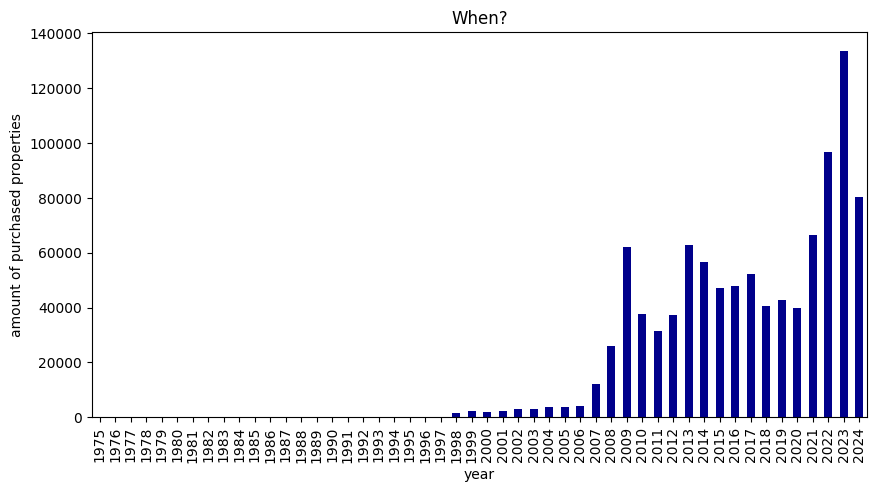

In [18]:
mistake = [1416, 1422]
dubai_data['year'] = dubai_data['year'].astype(int)
when = dubai_data.year[dubai_data['year'] > 1966].value_counts().sort_index()
plt.title('When?')
plt.xlabel('year')
plt.ylabel('amount of purchased properties')
when.plot(kind='bar', color='darkblue')




Too many dates. Let's simplify it a bit.

<Axes: title={'center': 'When?'}, xlabel='year', ylabel='amount of purchased properties'>

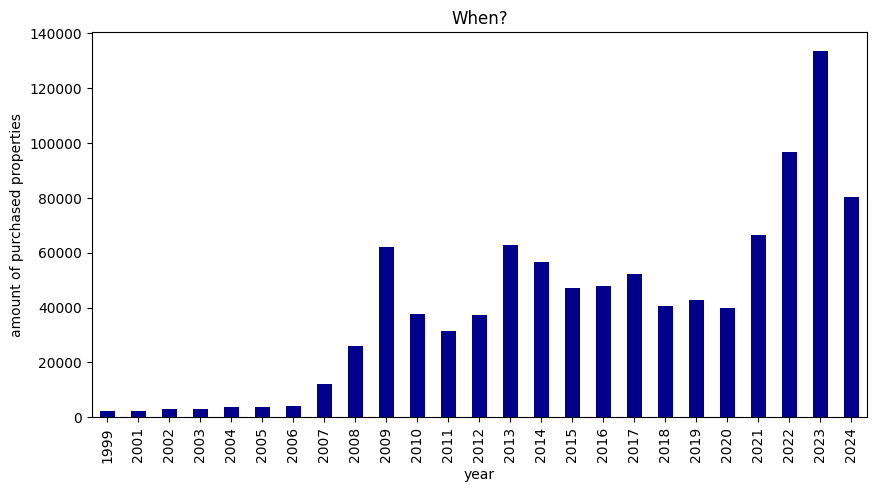

In [36]:
upper_bound = 1997
plt.title('When?')
plt.xlabel('year')
plt.ylabel('amount of purchased properties')
when[when > upper_bound].plot(kind='bar', color='darkblue')

And even more

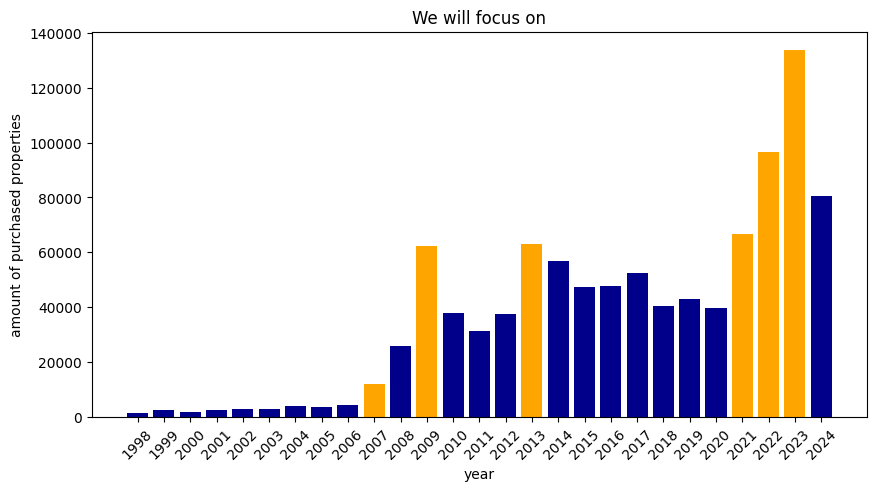

In [38]:
highlight_years = [2007, 2009, 2013, 2021, 2022, 2023]
when = dubai_data.year[dubai_data.year > upper_bound].value_counts().sort_index()
colors = ['darkblue'] * len(when)  
for year in highlight_years:
    if year in when.index:
        colors[list(when.index).index(year)] = 'orange'
bars = plt.bar(when.index, when, color=colors)
plt.xticks(ticks=when.index, labels=when.index, rotation=45)
plt.title('We will focus on')
plt.xlabel('year')
plt.ylabel('amount of purchased properties')
plt.show()

So far we have our first quetion (*my favourite one*): <b>why<b>. 


To answer it, we ned to take a closer look on when the properties were sold and find some possible correlations with what have happened in UAE or the world itself at that time.

In [241]:
month_colors = ['gray', 'indianred', 'darkred', 'salmon', 'sienna', 'goldenrod', 'darkkhaki', 'olive', 'seagreen', 'lightseagreen', 'teal', 'cornflowerblue' ]

Text(0.5, 1.0, '1998, sales distribution by month')

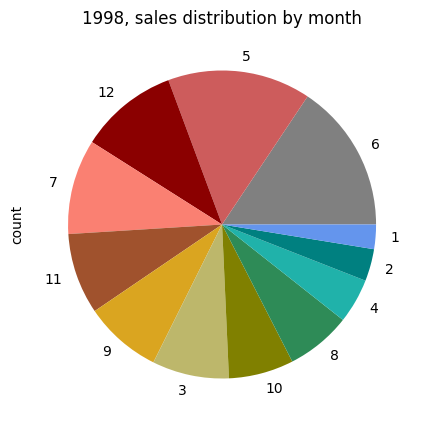

In [246]:
df_1998 = dubai_data[dubai_data['year'] == 1998]
month_counts = df_1998['month'].value_counts()
month_colors = ['gray', 'indianred', 'darkred', 'salmon', 'sienna', 'goldenrod', 'darkkhaki', 'olive', 'seagreen', 'lightseagreen', 'teal', 'cornflowerblue' ]
month_counts.plot(kind='pie', colors=month_colors)
plt.title('1998, sales distribution by month')

As we see,the 5th and 6th month were those when people bought the biggest amount of properties. What was that special about May and June? 

Firstly, tourist season in Dubai is on during November to March. In May temperature is usually between 38-25 degrees, it's hot and dry outside and almost time for sandstorms. 

Secondly, only in 2002, Dubai's government allowed foreigners to own the property outright. So what happened?

In 1998 UAE restored diplomatic relations with Iraq: they were severed at the outbreak of the 1991 Gulf War. So, I guess (more than), it had consequences. Also, other events in the world could have had an impact too.

Okay, what was next? 

Text(0.5, 1.0, '2007, sales distribution by month')

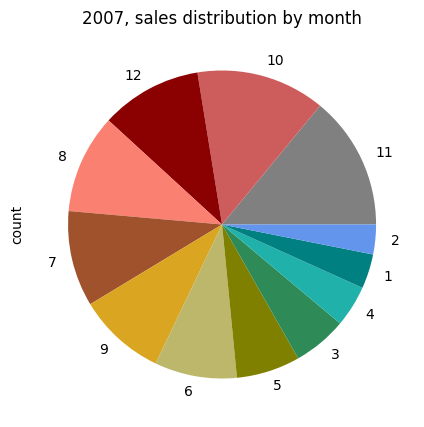

In [247]:
df_2007 = dubai_data[dubai_data['year'] == 2007]
month_counts = df_2007['month'].value_counts()
month_counts.plot(kind='pie', colors=month_colors)
plt.title('2007, sales distribution by month')

Again, we see increase starting on June, but this one is way smoother and affects other month too. We see, that starting from the middle of the year people started to buy more units every month. Why?

Let's see what people purchased.

Let's start with a quick overview. What was possible to buy in this dataset's time perioud?

(array([0, 1, 2]),
 [Text(0, 0, 'Sales'), Text(1, 0, 'Mortgages'), Text(2, 0, 'Gifts')])

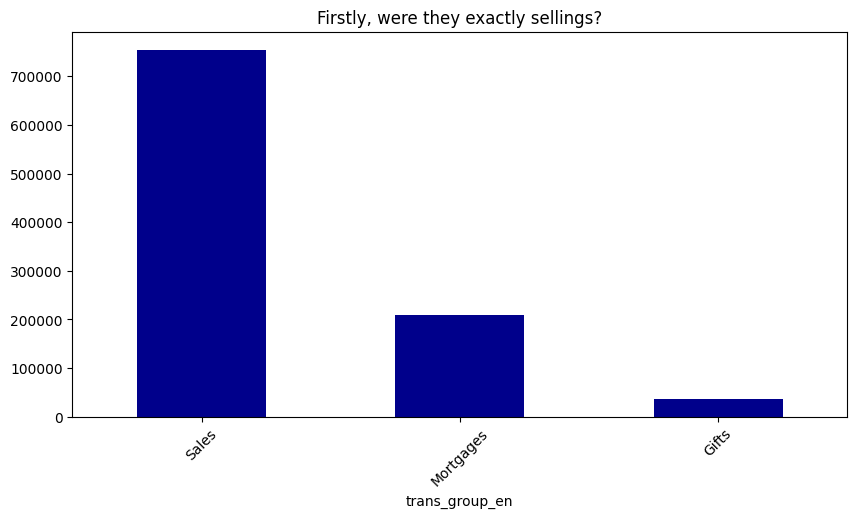

In [91]:
transaction_type = dubai_data.trans_group_en.value_counts()
transaction_type.plot(kind='bar', color='darkblue')
plt.title('Firstly, were they exactly sellings?')
plt.xticks(rotation=45)

Okay, they were (mostly).

Secondly, how purchased objects were supposed to be used?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Residential'),
  Text(1, 0, 'Commercial'),
  Text(2, 0, 'Hospitality '),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Industrial'),
  Text(5, 0, 'Multi-Use'),
  Text(6, 0, 'Agricultural'),
  Text(7, 0, 'Storage'),
  Text(8, 0, 'Residential / Commercial')])

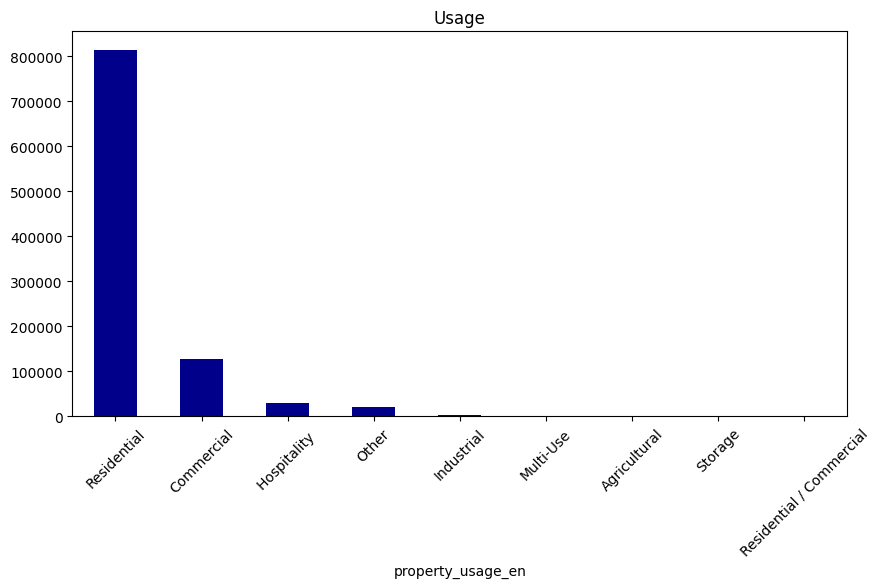

In [102]:
usage = dubai_data.property_usage_en.value_counts()
usage.plot(kind='bar', color='darkblue')
plt.title('Usage')
plt.xticks(rotation=45)

We see: mostly for new residents own non-comercial purposes.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Unit'),
  Text(1, 0, 'Villa'),
  Text(2, 0, 'Land'),
  Text(3, 0, 'Building')])

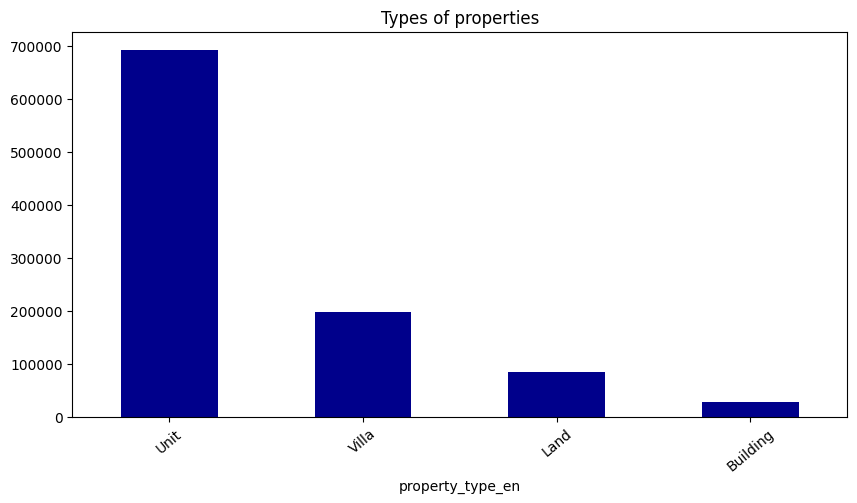

In [60]:
type_of_property = dubai_data.property_type_en.value_counts()
type_of_property.plot(kind='bar', color='darkblue')
plt.title('Types of properties')
plt.xticks(rotation=40)

Overall, mostly people bought units. What do we know about them? Let's see amount of rooms distribution.

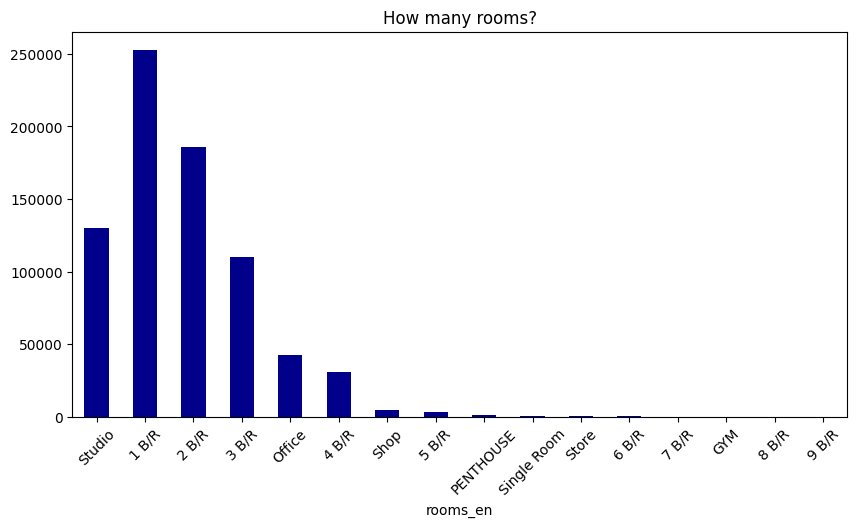

In [61]:
overall_rooms_count = dubai_data.rooms_en.value_counts()
room_order = ['Studio'] + [room for room in overall_rooms_count.index if room != 'Studio']
overall_rooms_count = overall_rooms_count.reindex(room_order)
overall_rooms_count.plot(kind='bar', color='darkblue')
plt.title('How many rooms?')
plt.xticks(rotation=45)
plt.show()

As we see, most preferable are the first four options. Though 1 and 2 bedroom apartments are leading.

And lastly, what's about parking spots?

([<matplotlib.axis.XTick at 0x299998b90>,
 [Text(0, 0, 'Parking (1)'), Text(1, 0, 'No Parking (0)')])

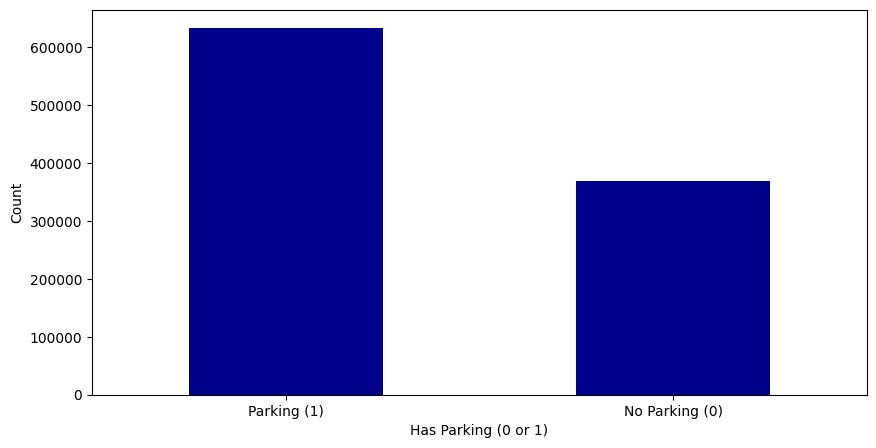

In [104]:
dubai_data.has_parking.value_counts()
parking = dubai_data.has_parking.value_counts()
parking.plot(kind='bar', color='darkblue')
plt.xlabel('Has Parking (0 or 1)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Parking (1)', 'No Parking (0)'], rotation=360)

<Axes: xlabel='Years'>

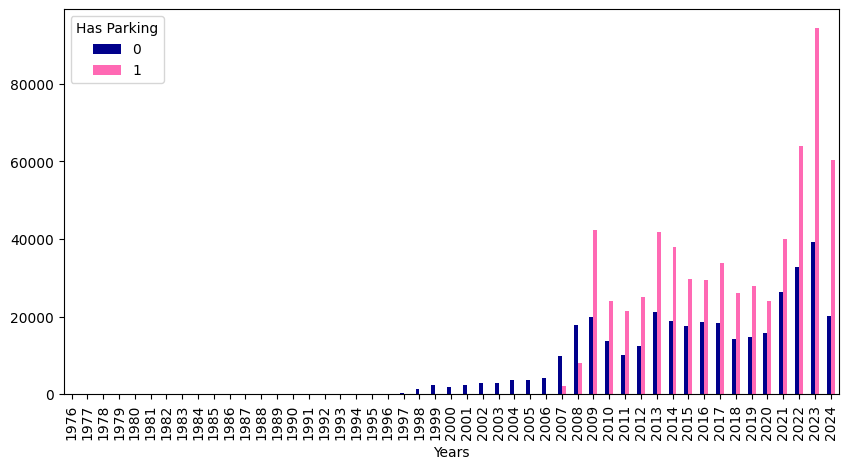

In [240]:
dubai_data_filtered = dubai_data[dubai_data['year'] > 1975]
cross_tab = pd.crosstab(dubai_data_filtered['year'], dubai_data['has_parking'], rownames=['Years'], colnames=['Has Parking'])
colors = ['darkblue', 'hotpink']
cross_tab.plot(kind='bar', color=colors)


About this plot: it's obvious that since 2007 something has changed as private parking spaces are becoming to be attach to bigger amount of properies than before, and since 2009 we notice that most of properties now have it.

Back on track.

Text(0.5, 1.0, '2006, sales distribution by ')

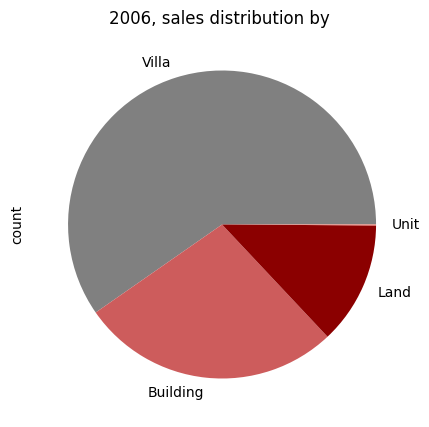

In [248]:
df_2006 = dubai_data[dubai_data['year'] == 2006]
month_counts = df_2006['property_type_en'].value_counts()
month_counts.plot(kind='pie', colors=month_colors)
plt.title('2006, sales distribution by ')

Text(0.5, 1.0, 'Types of units, 2007')

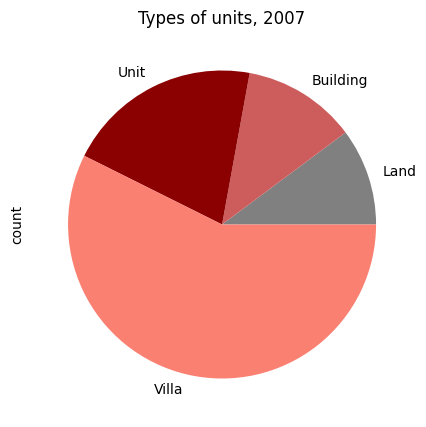

In [249]:
type_count = dubai_data[dubai_data['year'] == 2007].property_type_en.value_counts().sort_values()
type_count.plot(kind='pie', colors=month_colors)
plt.title('Types of units, 2007')

Text(0.5, 1.0, '2008, sales distribution by ')

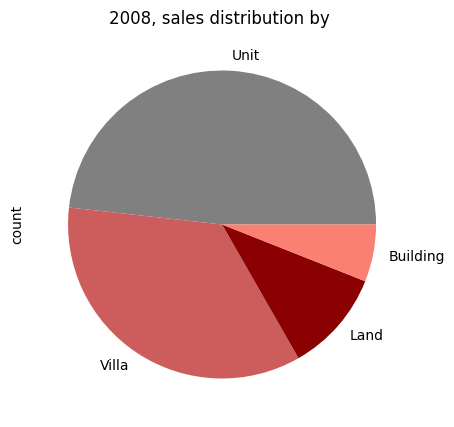

In [250]:
df_2008 = dubai_data[dubai_data['year'] == 2008]
month_counts = df_2008['property_type_en'].value_counts()
month_counts.plot(kind='pie', colors=month_colors)
plt.title('2008, sales distribution by ')

As we see, this year is remarkable because of the amount of bought units, as if before they were not that popular whatsoever. And according to what we see in 2008's plot, 2007 has also brought a new trend on buying them (since the popularity of units is only growing up).

Okay, next is 2009. I did the same stuff as we have already seen.

Text(0.5, 1.0, '2009, sales distribution by month')

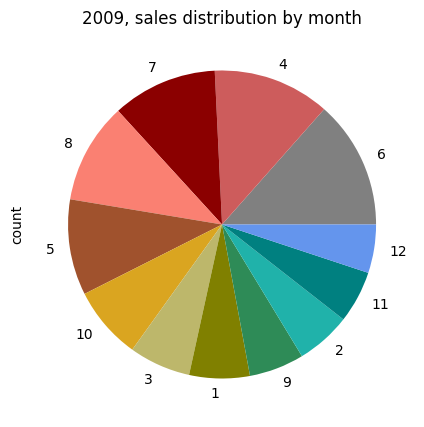

In [251]:
df_2009 = dubai_data[dubai_data['year'] == 2009]
month_counts = df_2009['month'].value_counts()
month_counts.plot(kind='pie', colors=month_colors)
plt.title('2009, sales distribution by month')

And again we see that number of sales has increased after May. Looks like a dynamic (and intresting question for future analisys)! 

Okay, let's take a look on what was popular at that time:

Text(0.5, 1.0, '2009, types of properies')

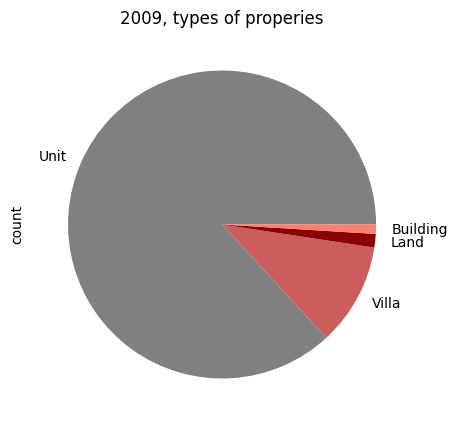

In [252]:
df_2009 = dubai_data[dubai_data['year'] == 2009]
month_counts = df_2009['property_type_en'].value_counts()
month_counts.plot(kind='pie', colors=month_colors)
plt.title('2009, types of properies')

Looks like our gues about growing popularity of units could be right.

Okay, let's look at something new. Types of rooms, for example:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '6 B/R'),
  Text(1, 0, 'GYM'),
  Text(2, 0, 'Store'),
  Text(3, 0, '5 B/R'),
  Text(4, 0, 'PENTHOUSE'),
  Text(5, 0, 'Shop'),
  Text(6, 0, 'Single Room'),
  Text(7, 0, '4 B/R'),
  Text(8, 0, '3 B/R'),
  Text(9, 0, 'Office'),
  Text(10, 0, 'Studio'),
  Text(11, 0, '2 B/R'),
  Text(12, 0, '1 B/R')])

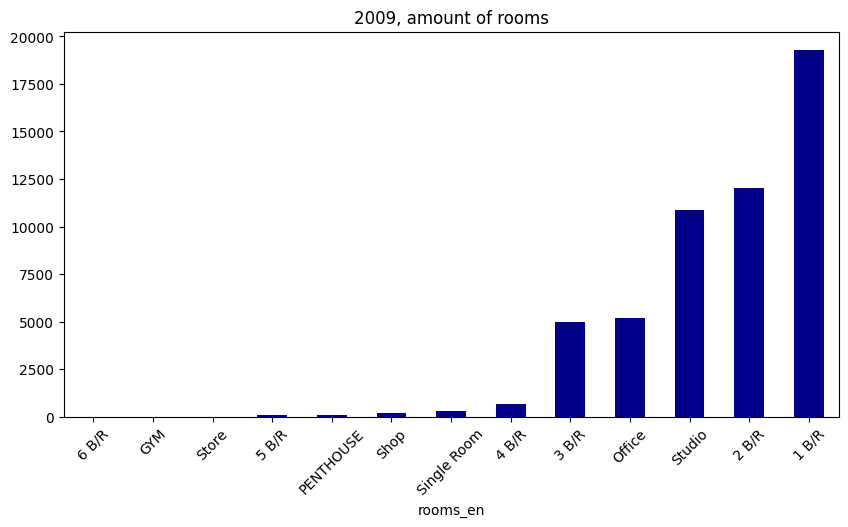

In [72]:
rooms_count = dubai_data[dubai_data['year'] == 2009].rooms_en.value_counts().sort_values()
rooms_count.plot(kind='bar', color='darkblue')
plt.title('2009, amount of rooms')
plt.xticks(rotation=45)

1 bedroom apartments seems to be the most popular, though studious and 2br were on demand too. For me, it could have something to do with investments.

And we keep in mind our question: why the market was growing in 2009? Well, Google says that in this time perioud there was a big housing crash after the 2008's global financial crisis. I guess, there is no contradictory here, since even during the crises 1) some people trying to do _something_ (to save their money and whatnot), 2) government tryes to manage it, the crisis (let's do not forget about this party's actions too), 3) the market growth tendency from previous year and country's economy itself (since the crises impact dif. countries a bit differently + they all have dif. background before it hits them).

Or we are relying on the dataset way too much... Moving on!

2013:

Text(0.5, 1.0, '2013, sales distribution by month')

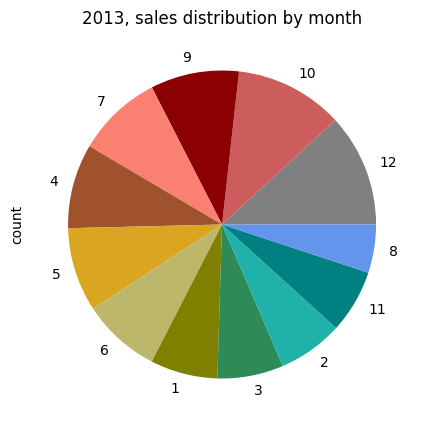

In [253]:
df_2013 = dubai_data[dubai_data['year'] == 2013]
month_counts = df_2013['month'].value_counts()
month_counts.plot(kind='pie', colors=month_colors)
plt.title('2013, sales distribution by month')

We notice an increase taking place from April and almost explosion on November and December.

Text(0.5, 1.0, '2013, types of properies')

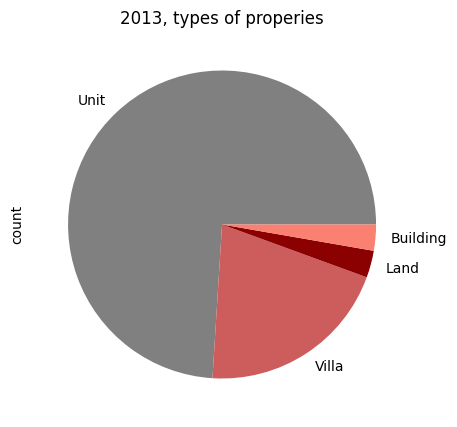

In [254]:
df_2013 = dubai_data[dubai_data['year'] == 2013]
month_counts = df_2013['property_type_en'].value_counts()
month_counts.plot(kind='pie', colors=month_colors)
plt.title('2013, types of properies')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '7 B/R'),
  Text(1, 0, '6 B/R'),
  Text(2, 0, 'Store'),
  Text(3, 0, '5 B/R'),
  Text(4, 0, 'Single Room'),
  Text(5, 0, 'PENTHOUSE'),
  Text(6, 0, 'Shop'),
  Text(7, 0, '4 B/R'),
  Text(8, 0, 'Office'),
  Text(9, 0, '3 B/R'),
  Text(10, 0, 'Studio'),
  Text(11, 0, '2 B/R'),
  Text(12, 0, '1 B/R')])

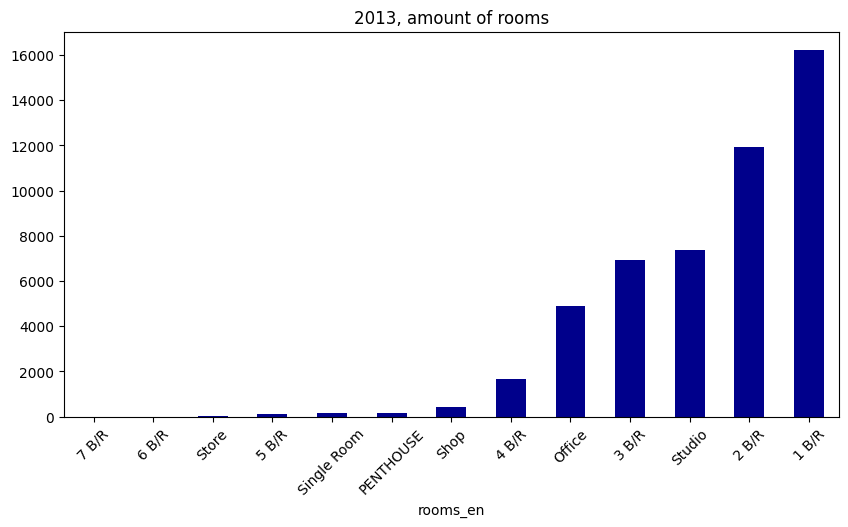

In [76]:
rooms_count = dubai_data[dubai_data['year'] == 2013].rooms_en.value_counts().sort_values()
rooms_count.plot(kind='bar', color='darkblue')
plt.title('2013, amount of rooms')
plt.xticks(rotation=45)

And that is how we can analyse each peak. Though we do not have enough time (and I personally do not have enough knowledge to make guesses about each of them).

However, you have probably noticed that we are not discussing who bought these properties, haven't you? Well, this sort of data is really tricky to search for (maybe you already know why no one wants to reveal it that oficially and free). Though ... (stay till the end).

Further, 2021!

Text(0.5, 1.0, '2021, sales distribution by month')

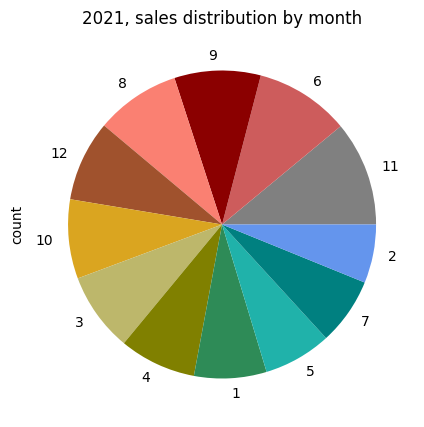

In [256]:
df_2021 = dubai_data[dubai_data['year'] == 2021]
month_counts = df_2021['month'].value_counts()
month_counts.plot(kind='pie', colors=month_colors)
plt.title('2021, sales distribution by month')

<Axes: ylabel='count'>

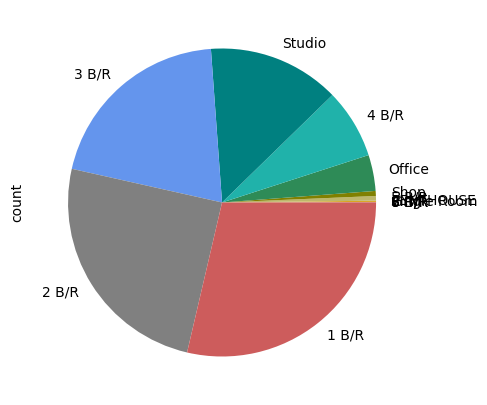

In [257]:
rooms_count = dubai_data[dubai_data['year'] == 2021].rooms_en.value_counts().sort_values()
rooms_count.plot(kind='pie', colors=month_colors)

2022:

Text(0.5, 1.0, '2022, sales distribution by month')

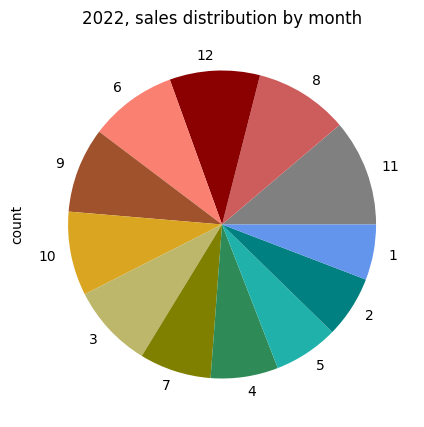

In [259]:
df_2022 = dubai_data[dubai_data['year'] == 2022]
month_counts = df_2022['month'].value_counts()
month_counts.plot(kind='pie', colors=month_colors)
plt.title('2022, sales distribution by month')

I guess, you remember that sells were higher this year. And I also guess you can make your own prediction why (or just don't want to make comments on this year, who knows?)

Now we are closer to our days. Let's take a look on 2023 market.

Text(0.5, 1.0, '2023, sales distribution by month')

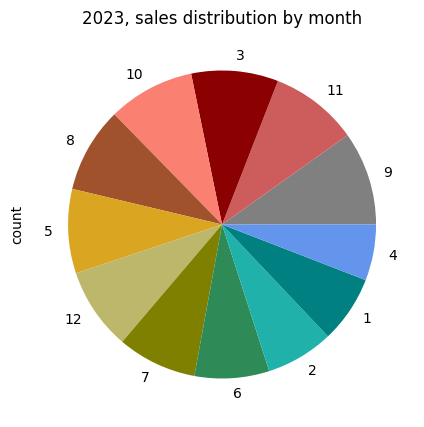

In [261]:
df_2023 = dubai_data[dubai_data['year'] == 2023]
month_counts = df_2023['month'].value_counts()
month_counts.plot(kind='pie', colors=month_colors)
plt.title('2023, sales distribution by month')

<Axes: ylabel='count'>

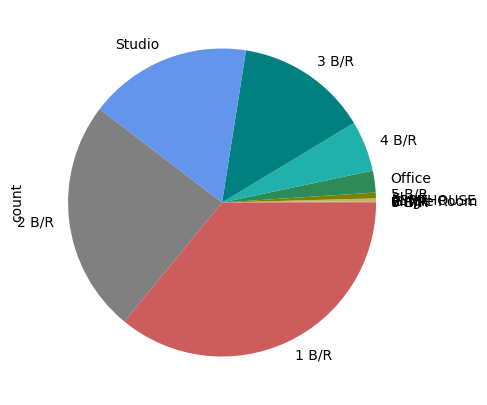

In [262]:
rooms_count = dubai_data[dubai_data['year'] == 2023].rooms_en.value_counts().sort_values()
rooms_count.plot(kind='pie', colors=month_colors)

2024:

Text(0.5, 1.0, '2024, sales distribution by month')

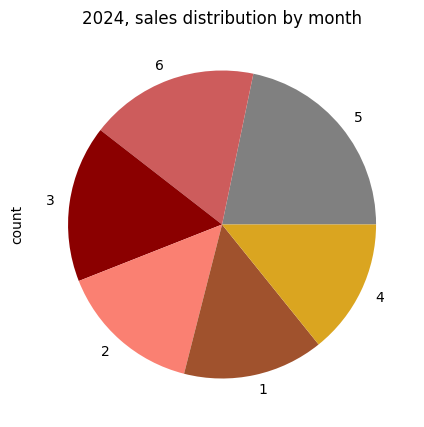

In [264]:
df_2024 = dubai_data[dubai_data['year'] == 2024]
month_counts = df_2024['month'].value_counts()
month_counts.plot(kind='pie', colors=month_colors)
plt.title('2024, sales distribution by month')

Since we are already here, could we make another question. What do you think: <b>could 2024 sales beat 2023?<b> 

I guess, we should take a look on monthly sales visualisation again.

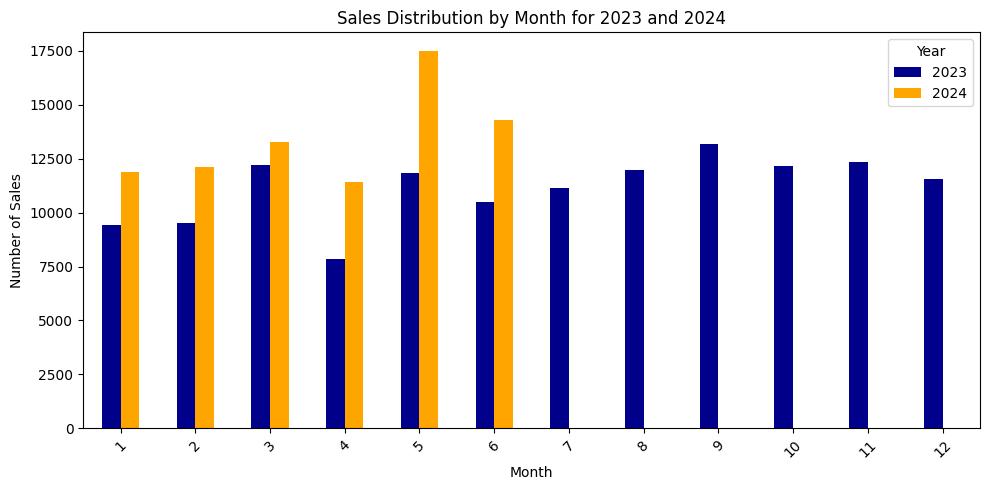

In [97]:
df_2023 = dubai_data[dubai_data['year'] == 2023]
df_2024 = dubai_data[dubai_data['year'] == 2024]
month_counts_2023 = df_2023['month'].value_counts()
month_counts_2024 = df_2024['month'].value_counts()
month_counts = pd.DataFrame({
    '2023': month_counts_2023,
    '2024': month_counts_2024
}).fillna(0)
colors = ('darkblue', 'orange')
month_counts.plot(kind='bar', color=colors)
plt.title('Sales Distribution by Month for 2023 and 2024')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

Looks like 2024 can beat 2023 if the market continues growing.

Okay, I suppose, at this point you are intrested about prices, aren't you? Let's see what we know about them.

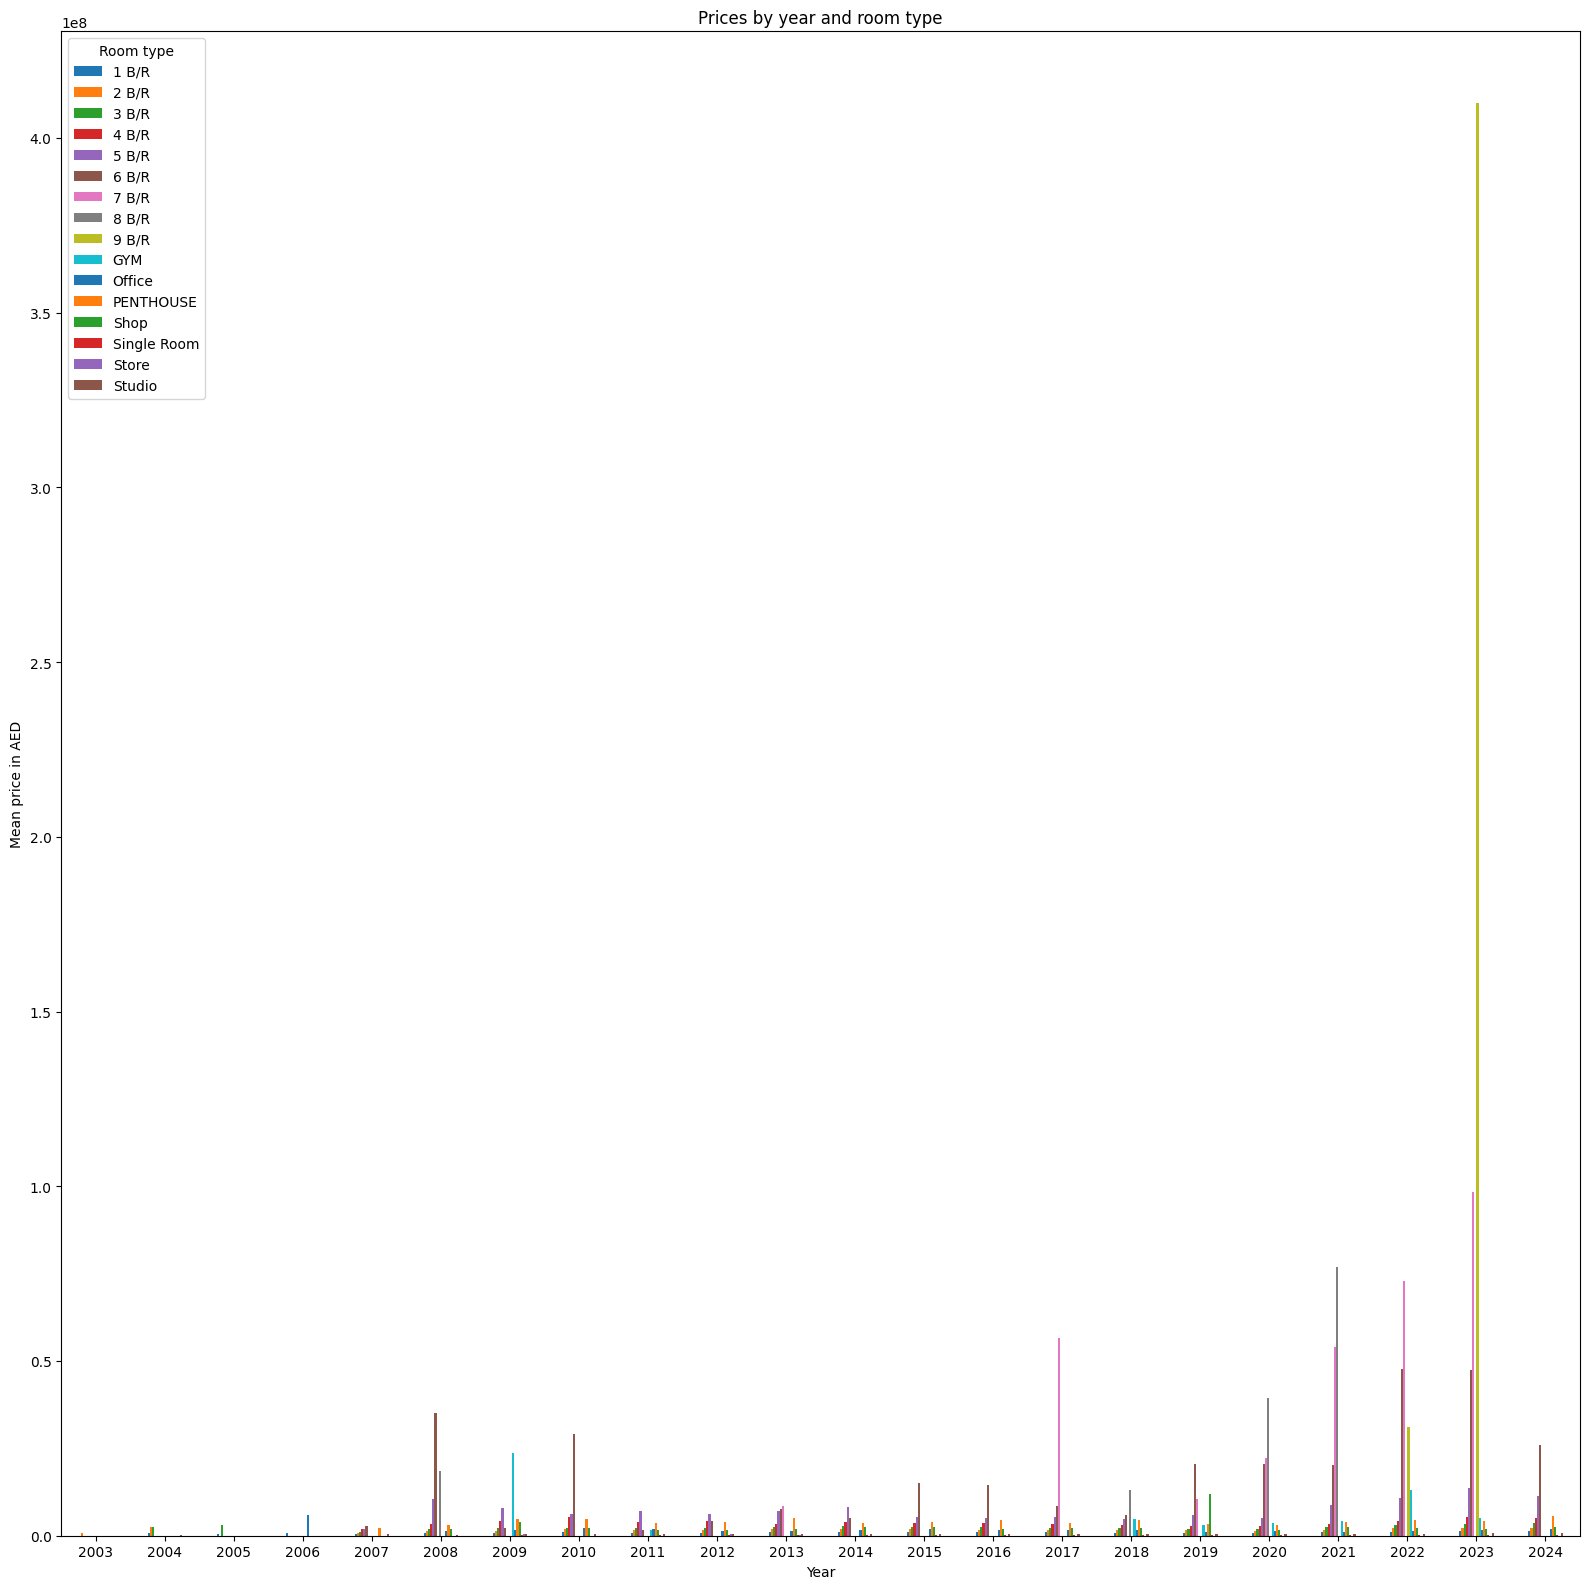

In [132]:
grouped_data = dubai_data.groupby(['year', 'rooms_en'])['actual_worth'].agg(['mean', 'count'])
grouped_data.unstack(level=1)['mean'].plot(kind='bar', figsize=(16, 16))
plt.title('Prices by year and room type')
plt.xlabel('Year')
plt.ylabel('Mean price in AED')
plt.xticks(rotation=0)
plt.legend(title='Room type')
plt.tight_layout()
plt.show()

Though it looks kinda scary. Let's simplify it a bit.

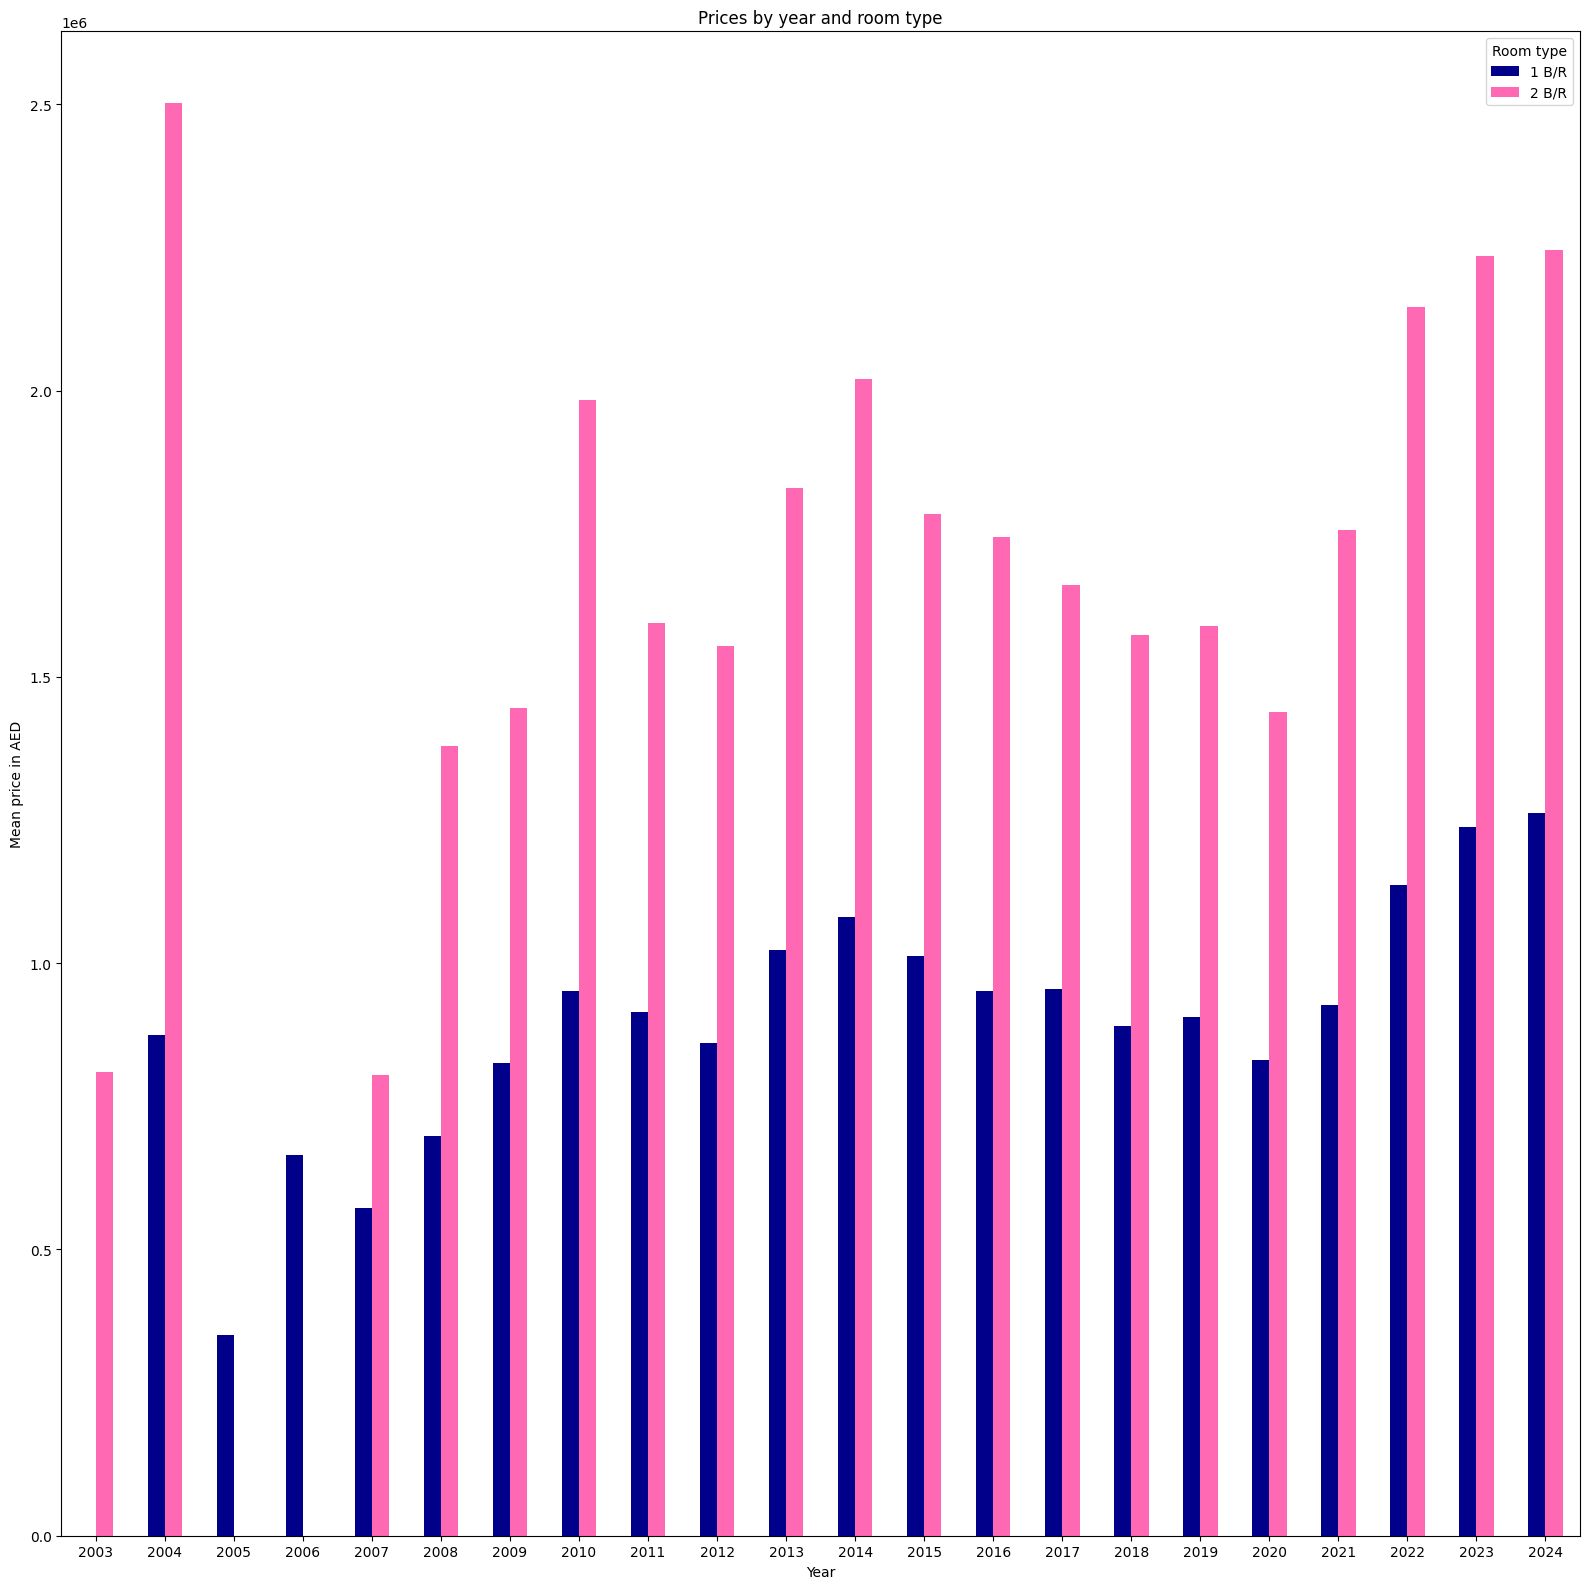

In [142]:
filtered_data = dubai_data[dubai_data['rooms_en'].isin(['1 B/R', '2 B/R'])]
grouped_data = filtered_data.groupby(['year', 'rooms_en'])['actual_worth'].agg(['mean', 'count'])
grouped_data.unstack(level=1)['mean'].plot(kind='bar', color=['darkblue', 'hotpink'], figsize=(16, 16))
plt.title('Prices by year and room type')
plt.xlabel('Year')
plt.ylabel('Mean price in AED')
plt.xticks(rotation=0)
plt.legend(title='Room type')
plt.tight_layout()
plt.show()

And now, where exactly people bought their properties?

Text(0.5, 0, 'amount')

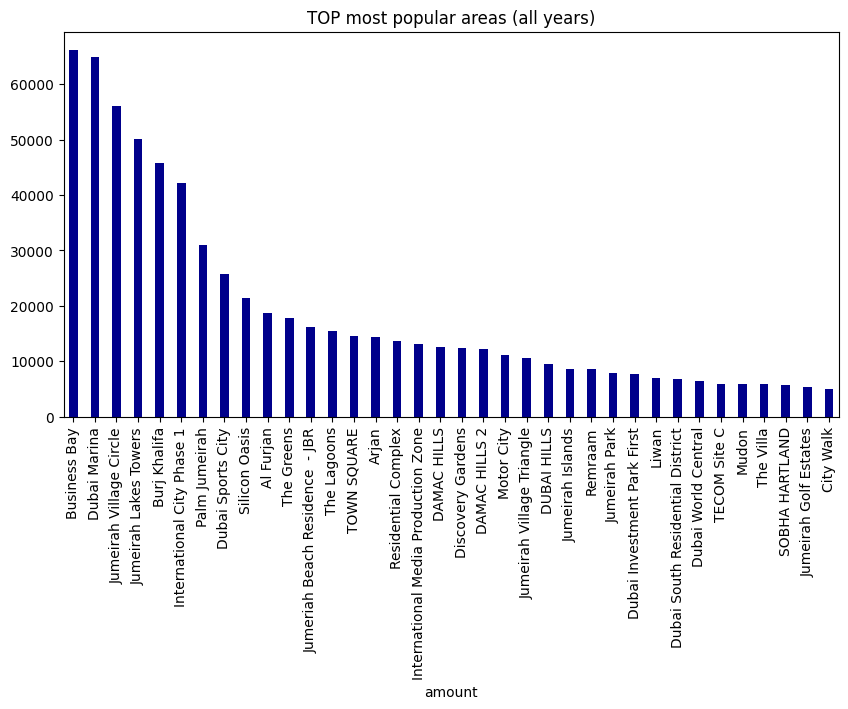

In [194]:
areas = dubai_data.master_project_en.value_counts() 
filtered_areas = areas[areas > 5000]
bar_width = 0.4 
filtered_areas.plot(kind="bar", color='darkblue', width=bar_width)
plt.title('TOP most popular areas (all years)')
plt.xlabel(xlabel='amount')

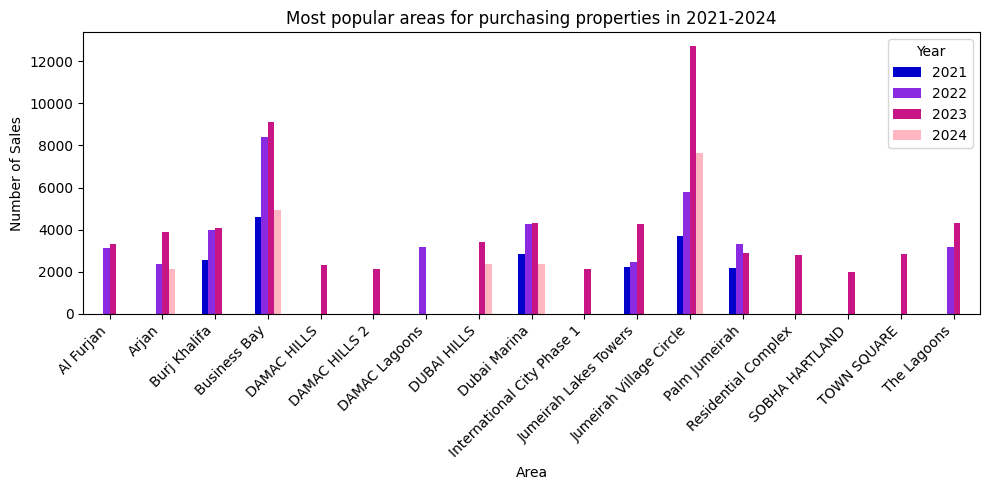

In [238]:
df_2021 = dubai_data[dubai_data['year'] == 2021]
df_2022 = dubai_data[dubai_data['year'] == 2022]
df_2023 = dubai_data[dubai_data['year'] == 2023]
df_2024 = dubai_data[dubai_data['year'] == 2024]
month_counts_2021 = df_2021['master_project_en'].value_counts()
month_counts_2021 = month_counts_2021[month_counts_2021 > 2000]
month_counts_2022 = df_2022['master_project_en'].value_counts()
month_counts_2022 = month_counts_2022[month_counts_2022 > 2000]
month_counts_2023 = df_2023['master_project_en'].value_counts()
month_counts_2023 = month_counts_2023[month_counts_2023 > 2000]
month_counts_2024 = df_2024['master_project_en'].value_counts()
month_counts_2024 = month_counts_2024[month_counts_2024 > 2000]
month_counts = pd.DataFrame({
    '2021': month_counts_2021,
    '2022': month_counts_2022,
    '2023': month_counts_2023,
    '2024': month_counts_2024
}).fillna(0)
colors = ['mediumblue', 'blueviolet', 'mediumvioletred', 'lightpink']
month_counts.plot(kind='bar', color=colors)
plt.title('Most popular areas for purchasing properties in 2021-2024')
plt.xlabel('Area')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

Just for a comparison:

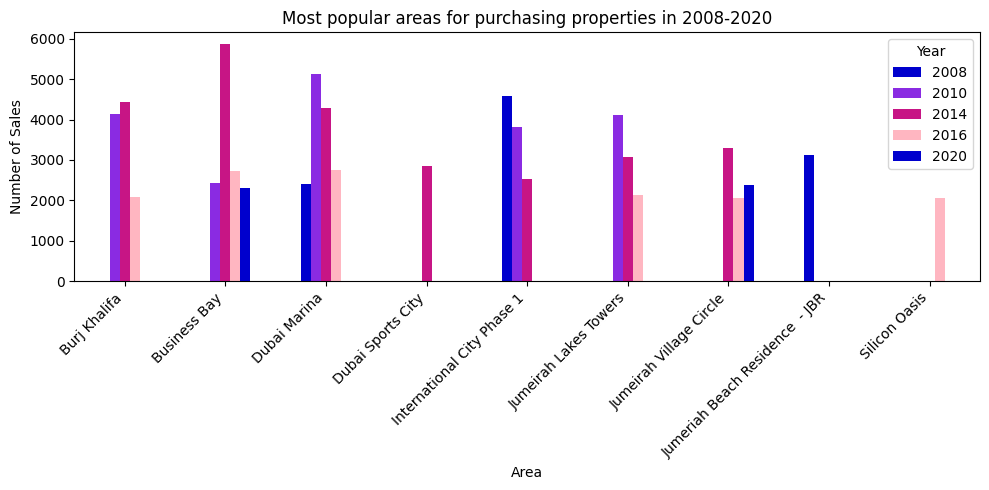

In [271]:
df_2008 = dubai_data[dubai_data['year'] == 2008]
df_2010 = dubai_data[dubai_data['year'] == 2010]
df_2014 = dubai_data[dubai_data['year'] == 2014]
df_2016 = dubai_data[dubai_data['year'] == 2016]
df_2020 = dubai_data[dubai_data['year'] == 2020]
month_counts_2008 = df_2008['master_project_en'].value_counts()
month_counts_2008 = month_counts_2008[month_counts_2008 > 2000]
month_counts_2010 = df_2010['master_project_en'].value_counts()
month_counts_2010 = month_counts_2010[month_counts_2010 > 2000]
month_counts_2014 = df_2014['master_project_en'].value_counts()
month_counts_2014 = month_counts_2014[month_counts_2014 > 2000]
month_counts_2016 = df_2016['master_project_en'].value_counts()
month_counts_2016 = month_counts_2016[month_counts_2016 > 2000]
month_counts_2020 = df_2020['master_project_en'].value_counts()
month_counts_2020 = month_counts_2020[month_counts_2020 > 2000]
month_counts = pd.DataFrame({
    '2008': month_counts_2008,
    '2010': month_counts_2010,
    '2014': month_counts_2014,
    '2016': month_counts_2016,
    '2020': month_counts_2020
}).fillna(0)
colors = ['mediumblue', 'blueviolet', 'mediumvioletred', 'lightpink']
month_counts.plot(kind='bar', color=colors)
plt.title('Most popular areas for purchasing properties in 2008-2020')
plt.xlabel('Area')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

Looks like some areas that were just completed were the most popular just after their completion (and some remained the most popular among the years)

And that's pretty much it! 

# def(Creepy creep💀💀💀):

Although I didn't tell you who were these people who bought all these properties, didn't I? Which means that we can cover it now.

Although I told you before that it could be tricky to find such data + my dataset does not cover it, now, I guess, I should admit that the first statement was kinda not sincere at all. And what's more, let's take a look on my dataset once again:

In [20]:
r1 = dubai_data.iloc[1]
print (r1)

transaction_id                                1-11-2011-6898
procedure_id                                              11
trans_group_id                                             1
trans_group_en                                         Sales
procedure_name_en                                       Sell
instance_date                                     21-04-2011
property_type_id                                           3
property_type_en                                        Unit
property_sub_type_id                                    60.0
property_sub_type_en                                    Flat
property_usage_en                                Residential
reg_type_id                                                1
reg_type_en                              Existing Properties
area_id                                                  390
area_name_en                                    Burj Khalifa
building_name_en                                Burj Khalifa
project_number          

In [21]:
r1[0]

/var/folders/jn/6s8qvkmx1d120gy_dslswrpc0000gq/T/ipykernel_1657/1258692551.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r1[0]


'1-11-2011-6898'

You see this numbers right in the first column? This is a transaction ID, every singe transaction posess one so it's possible to track money from sender to recepient. And from here, I guess, you could already guess what I'm trying to say. 

Using this unique number, we can acsess some aditional info about this transaction. Moreover, it's possible to do not only on some 'official' websites (like "Dubai Land Development", "Dubai Puslse" and whatnot) but there are a bunch of websites made of leaking data.

In [22]:
import IPython.display

In [23]:
from IPython.display import Image

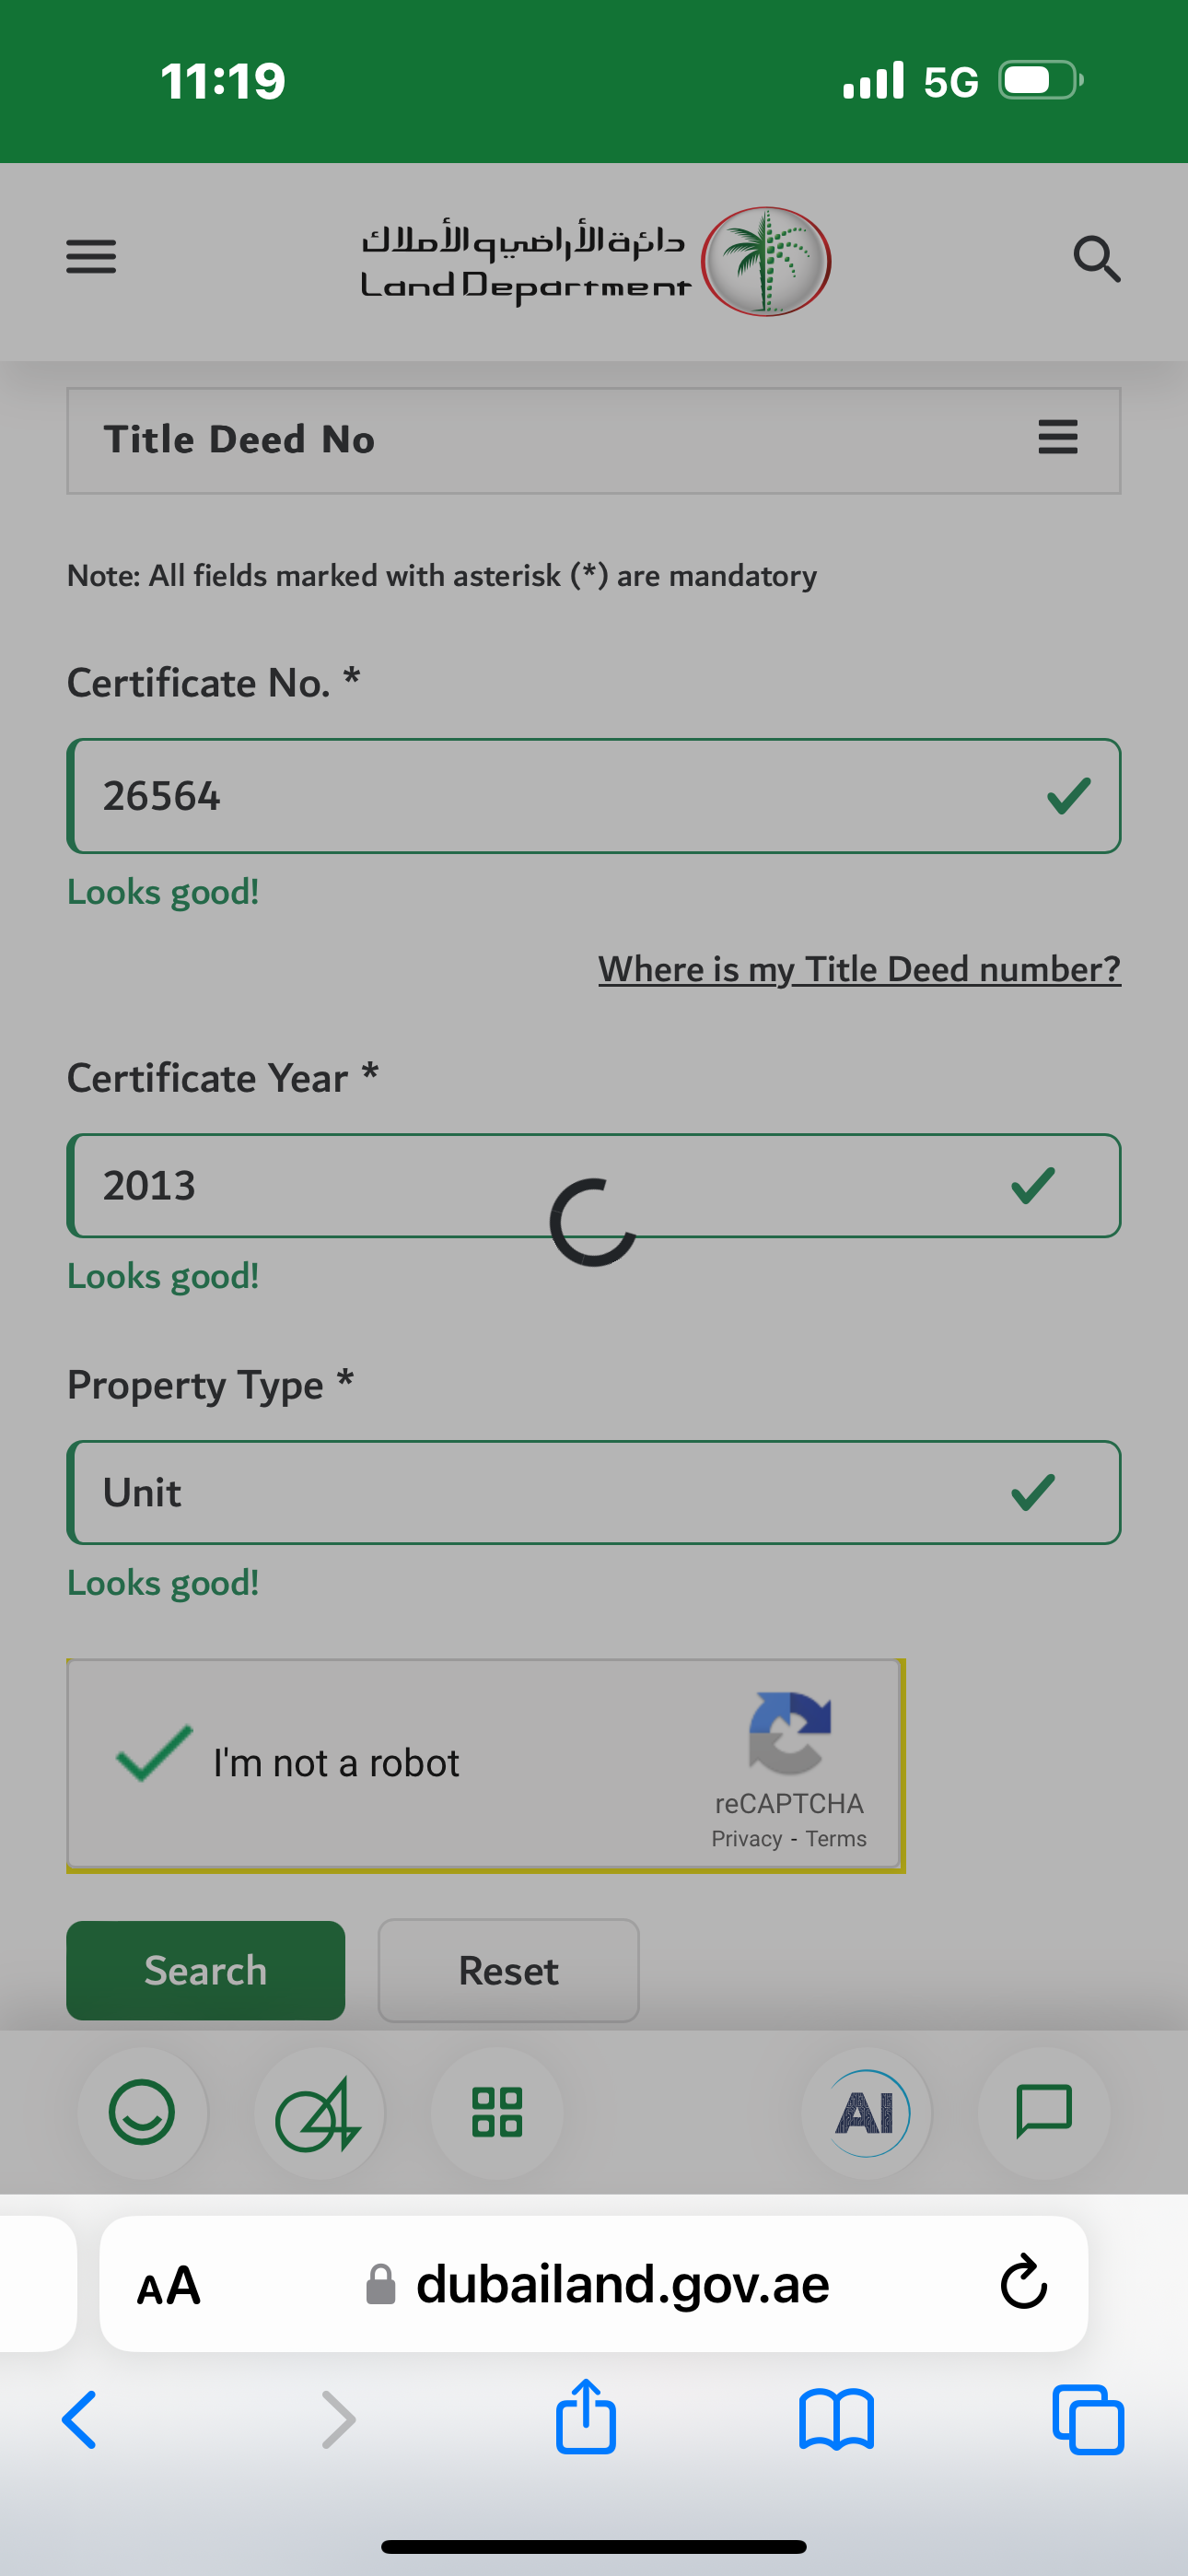

In [27]:
Image('/Users/onionofthefield/Desktop/IMG_4769.PNG')

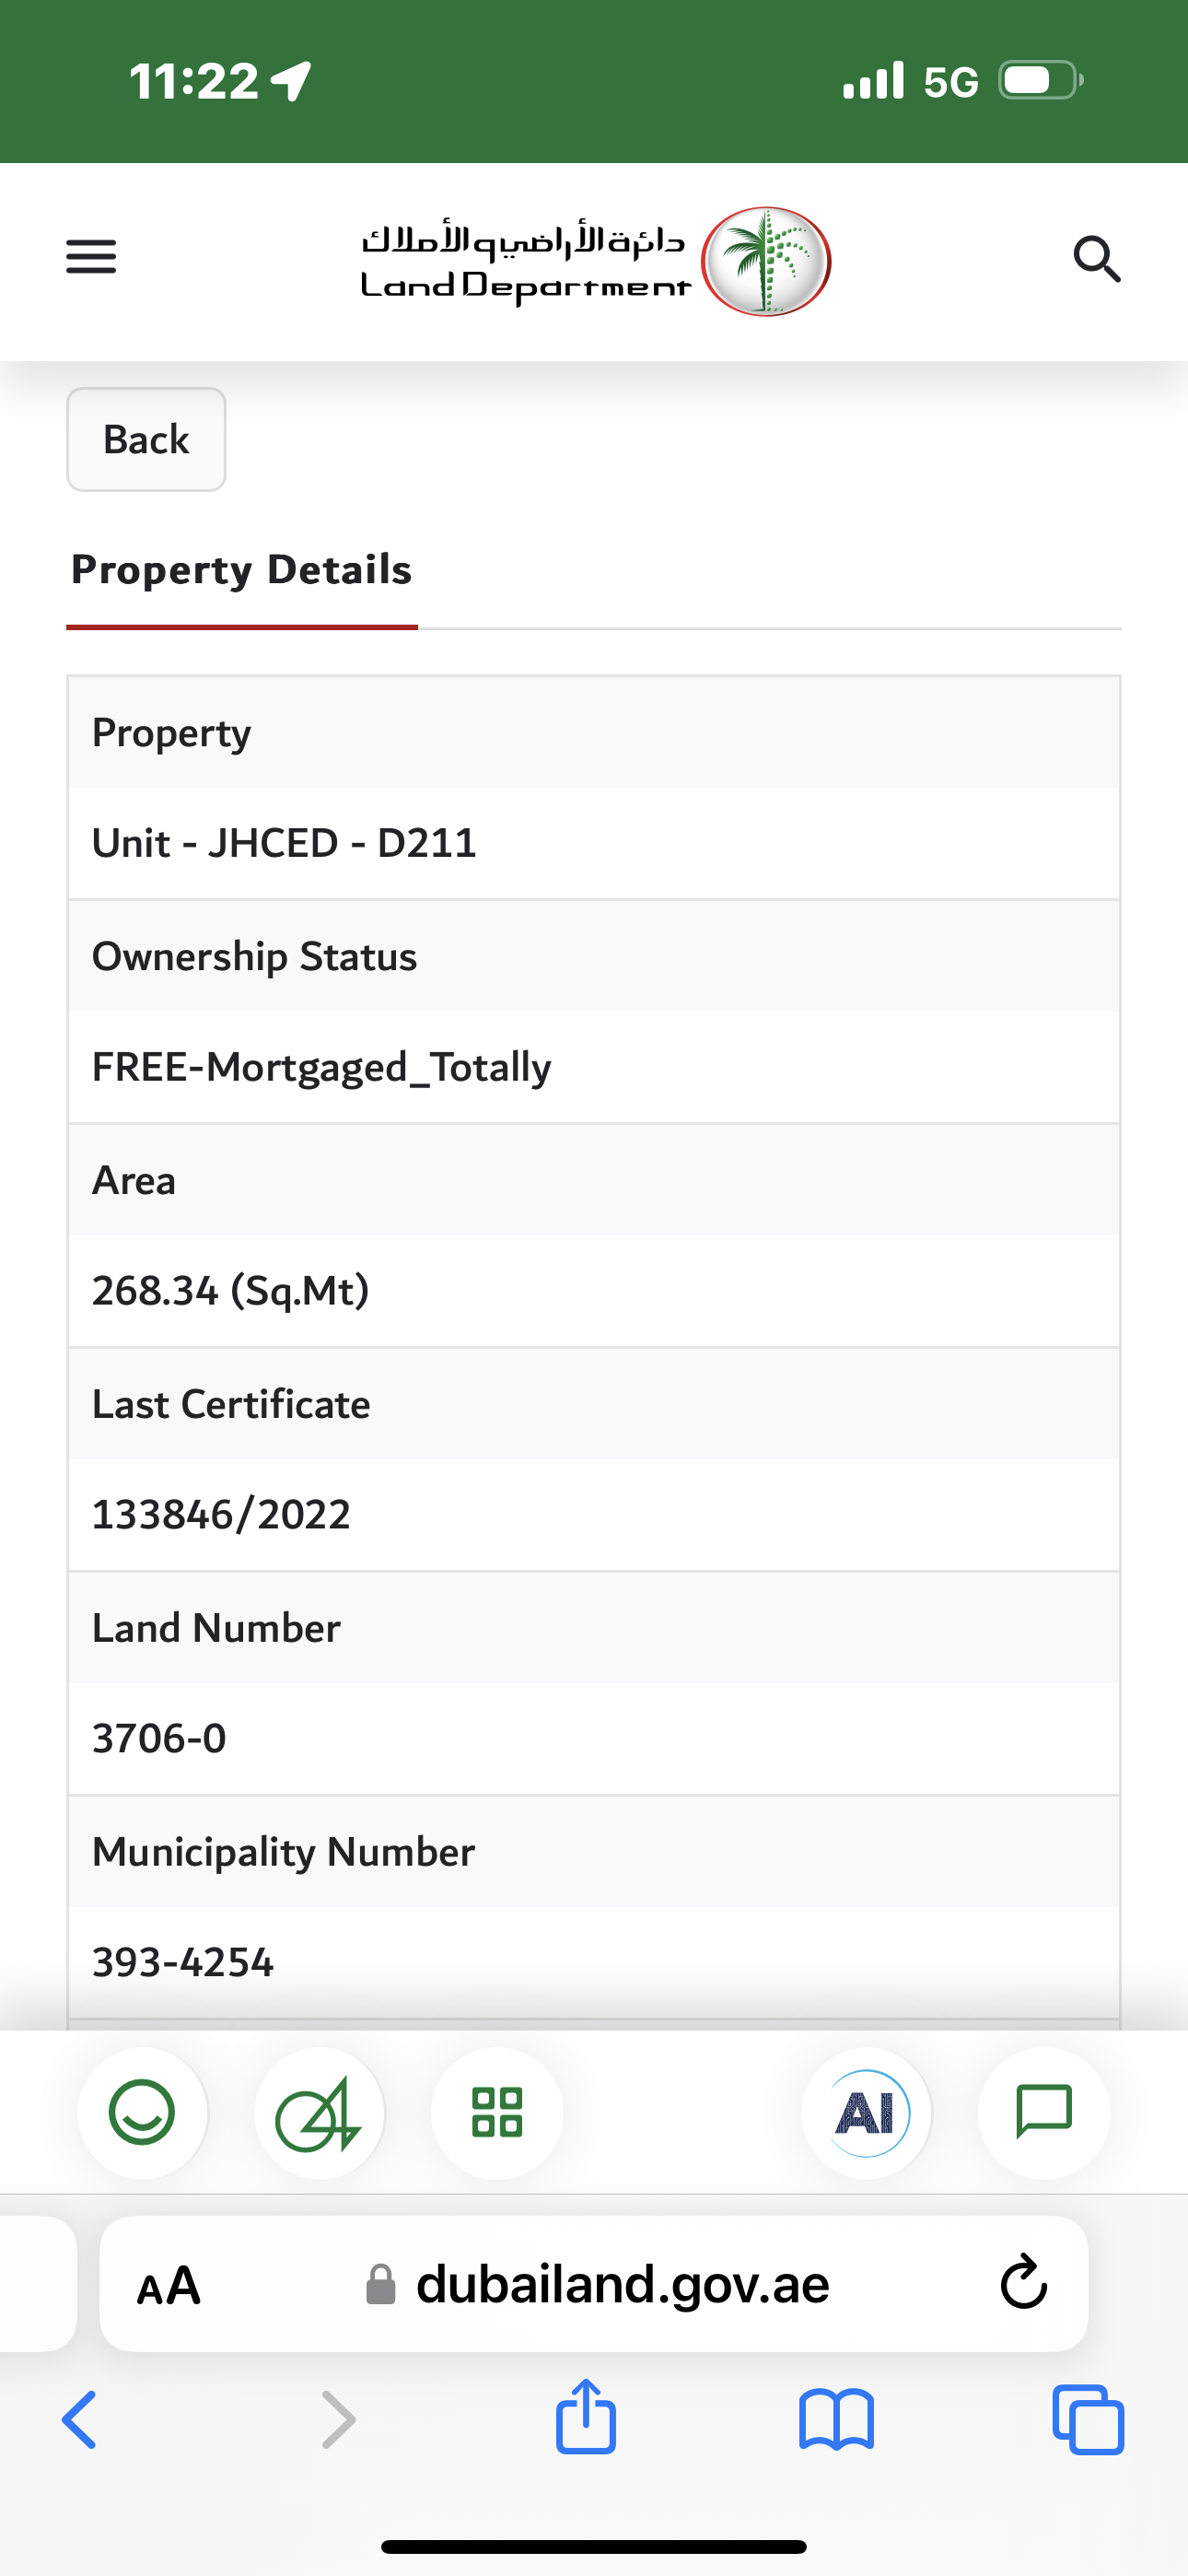

In [28]:
Image('/Users/onionofthefield/Desktop/IMG_4770.PNG')

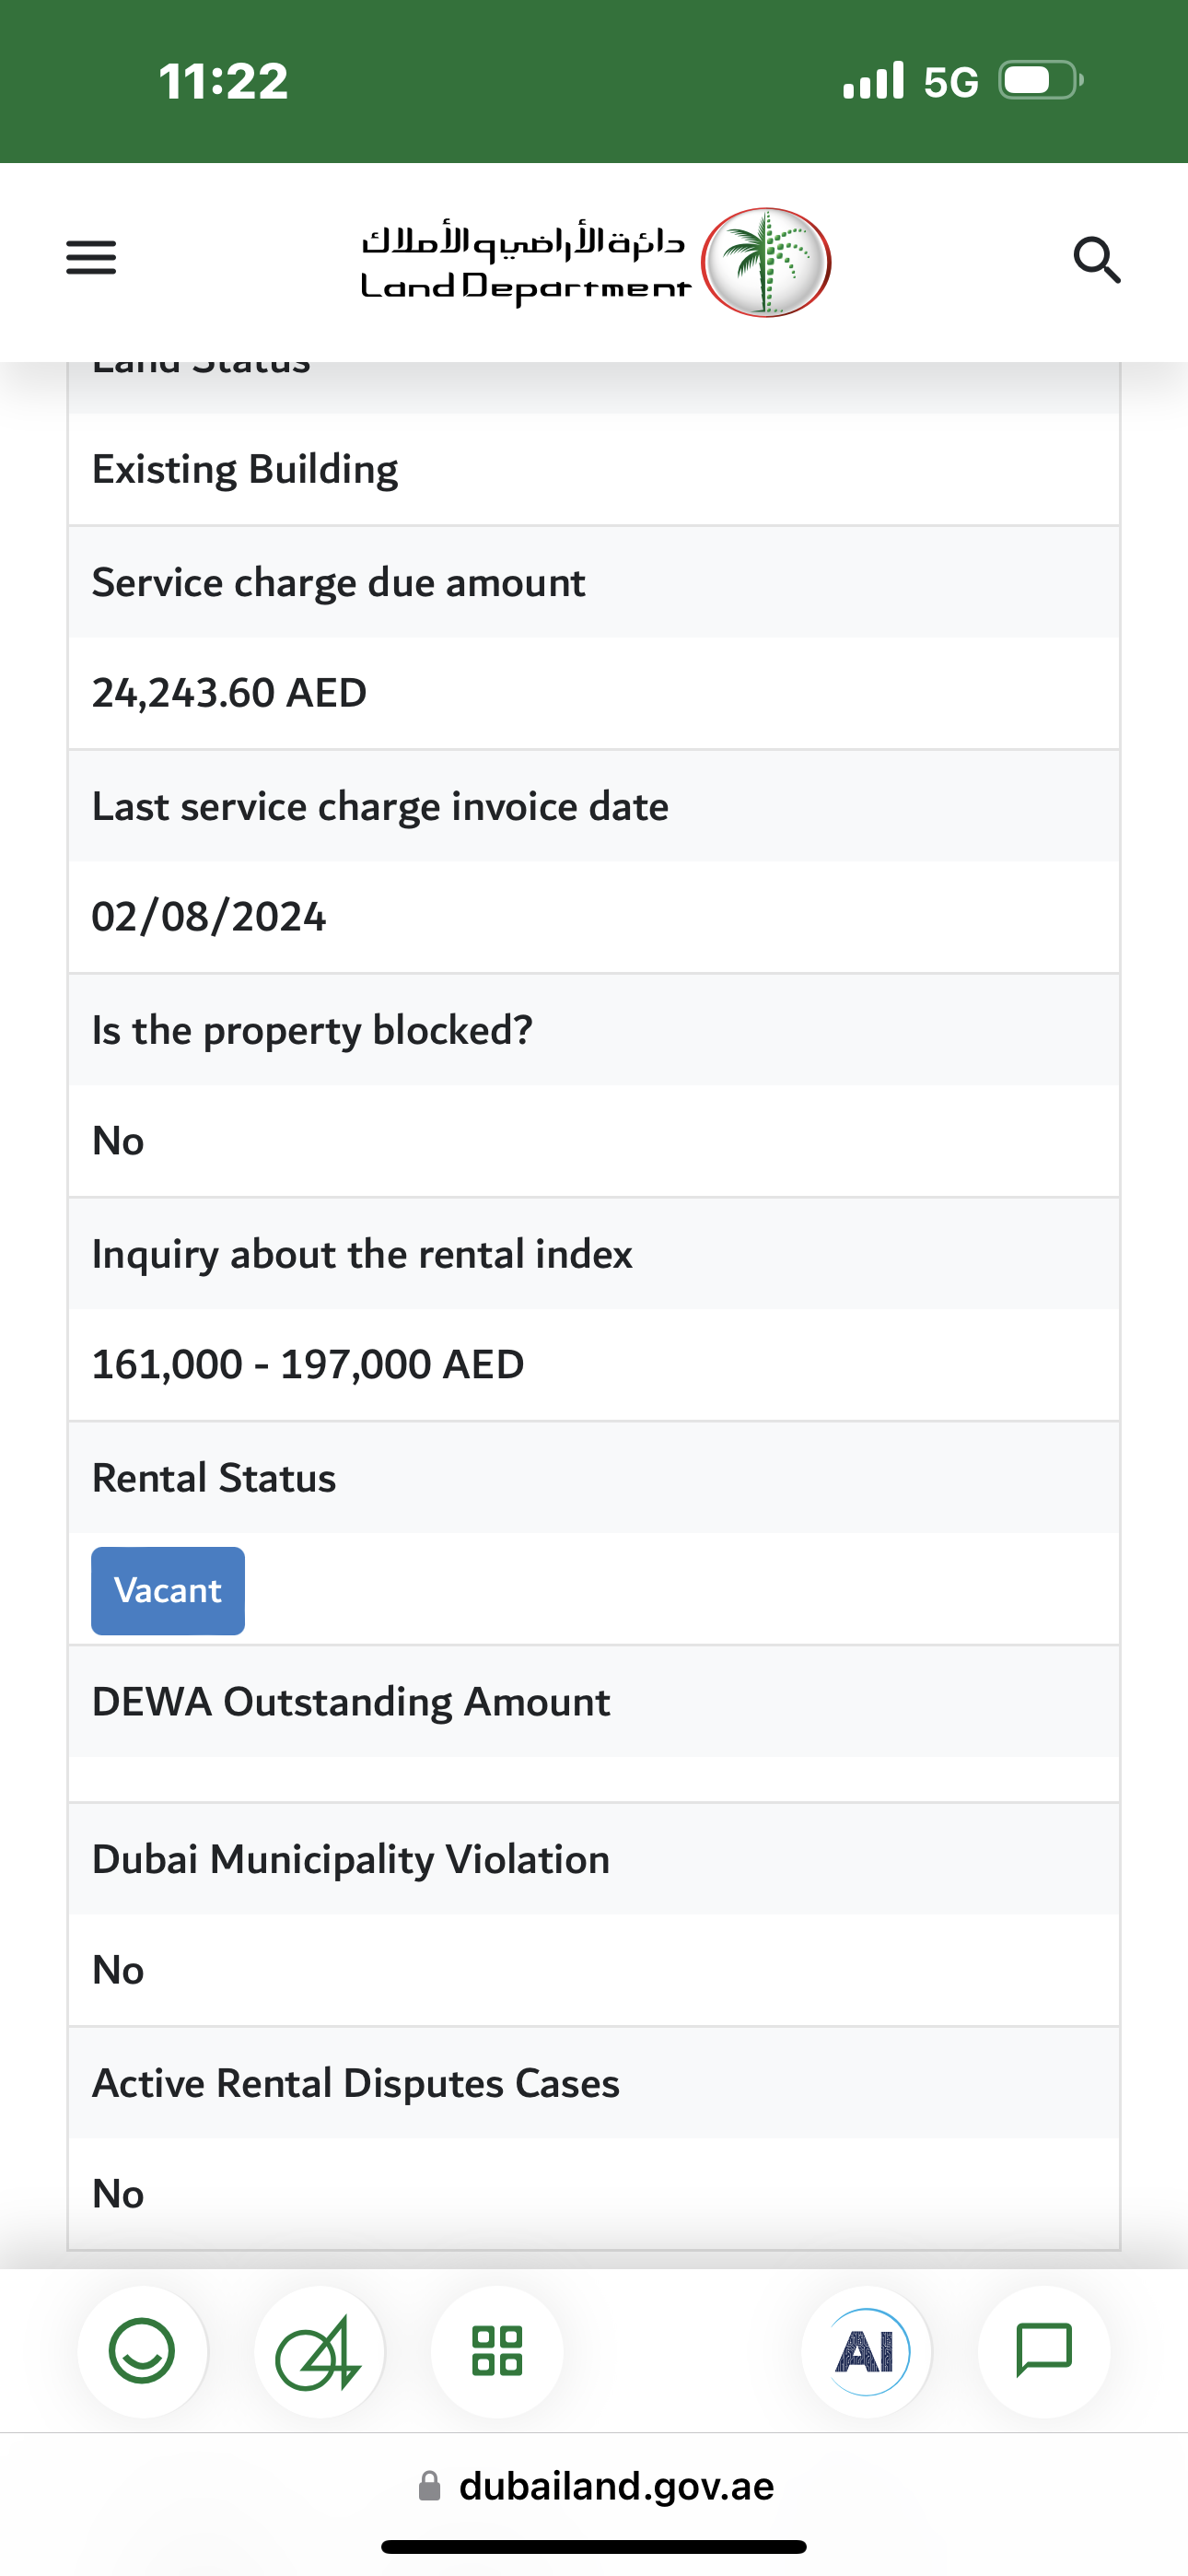

In [29]:
Image('/Users/onionofthefield/Desktop/IMG_4773.PNG')

*Disclaimer: here are another properties details, but only some of them just to get aquainted of the idea of what is possible to do.*

print('And some leaks, as I mentioned:')
Image('/Users/onionofthefield/Desktop/IMG_4773.PNG')

And some leaks, as I mentioned:


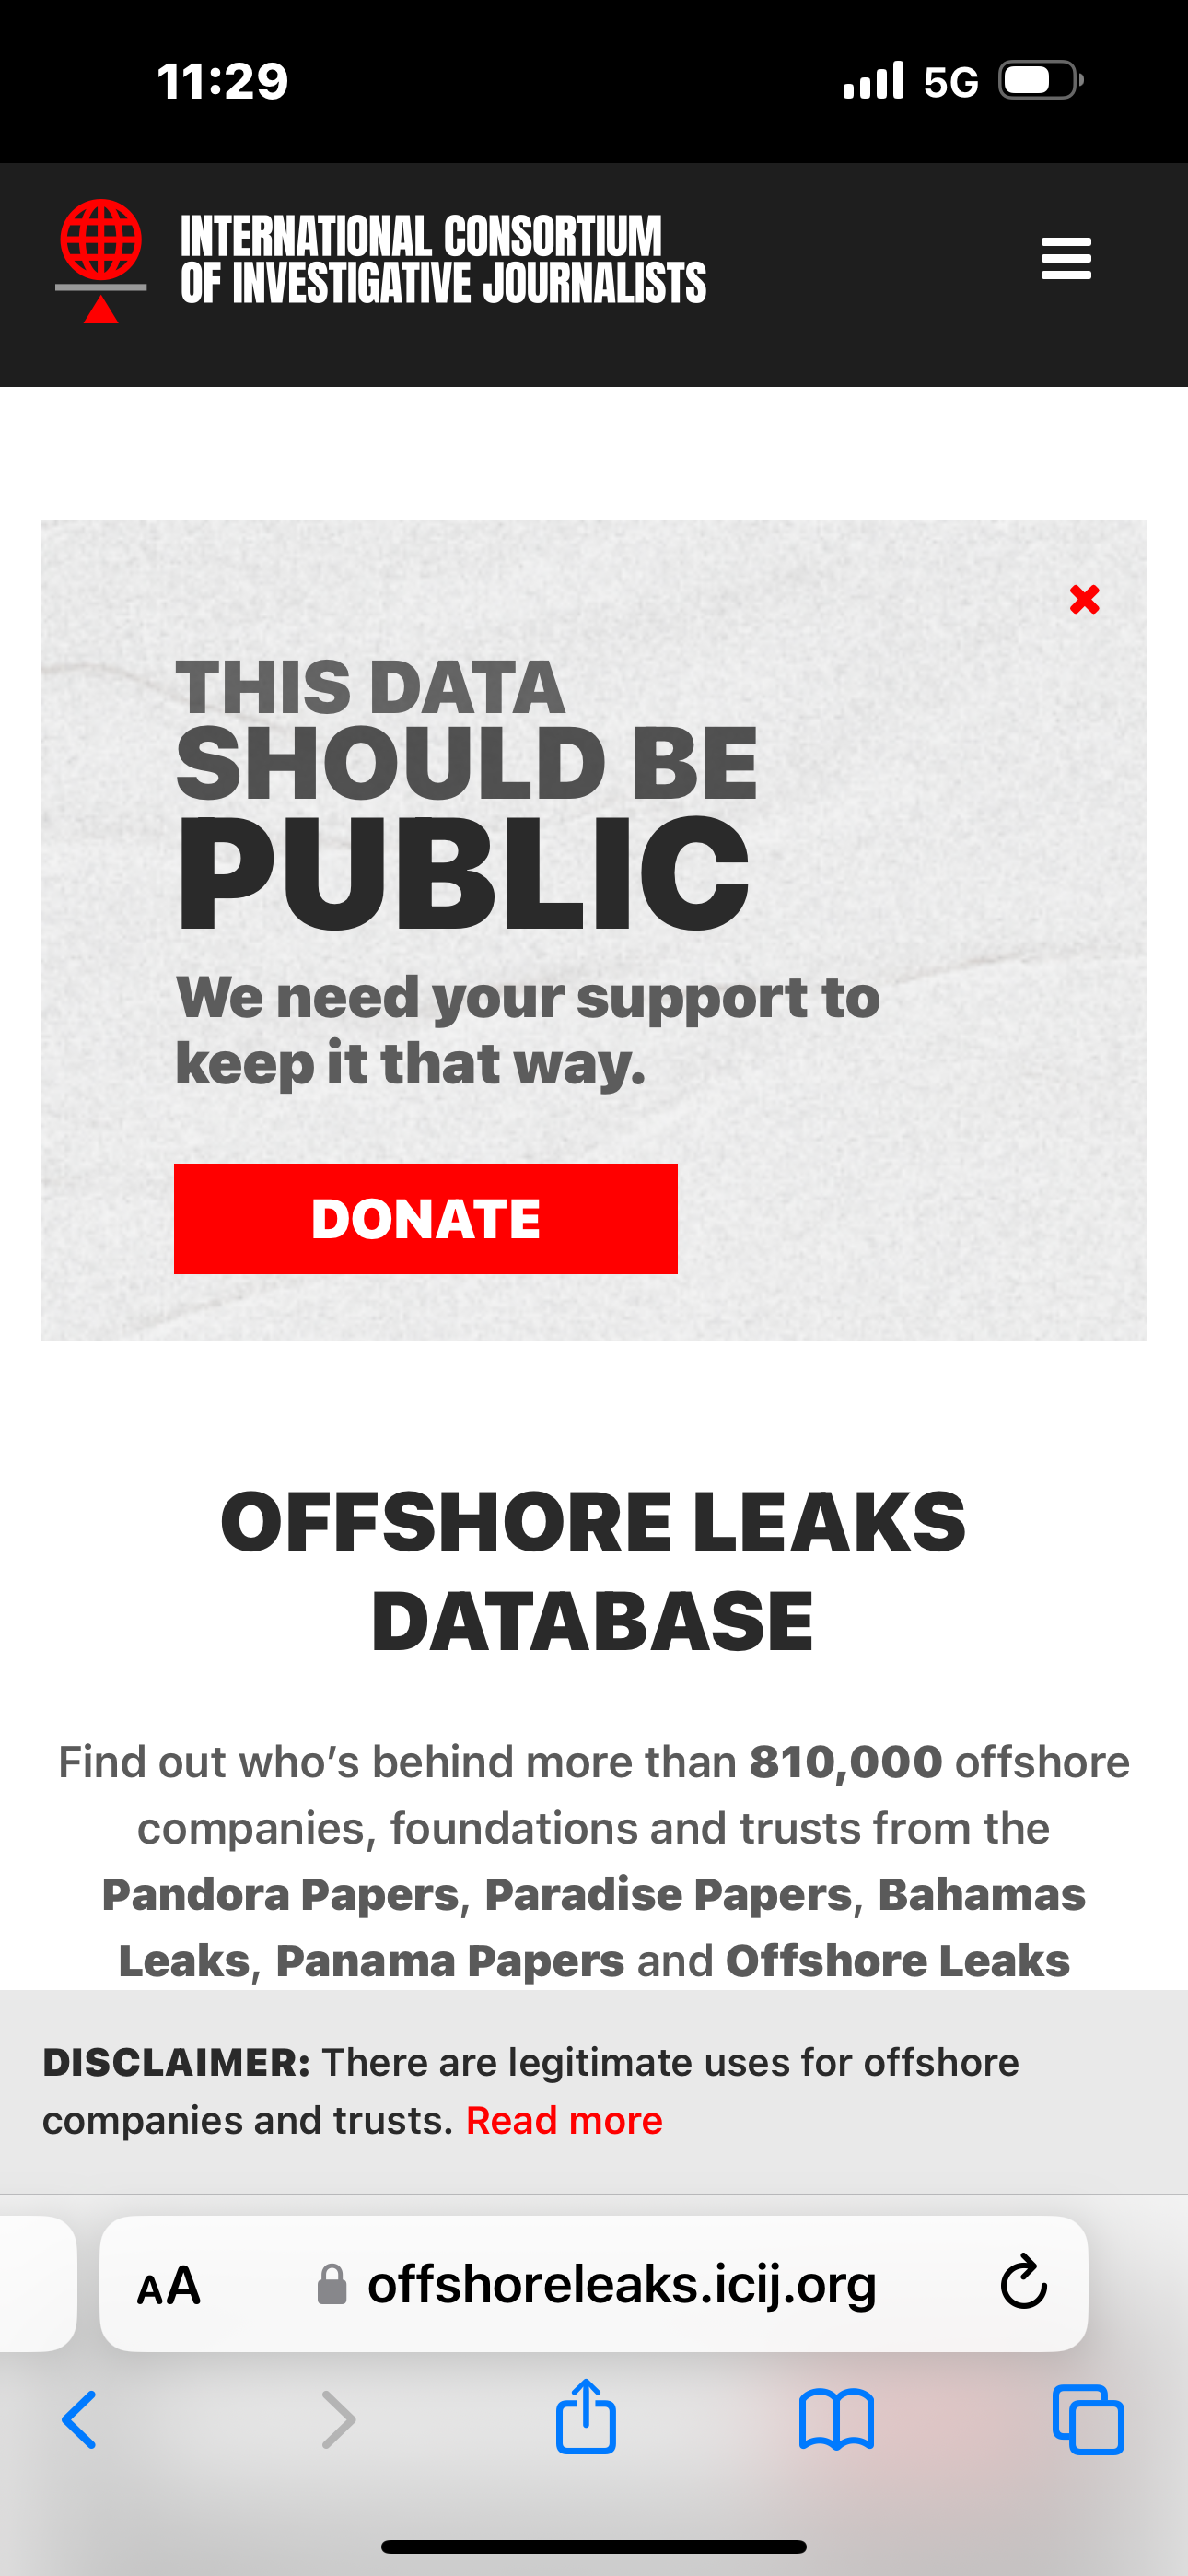

In [30]:
print('And some leaks, as I mentioned:')
Image('/Users/onionofthefield/Desktop/IMG_4774.PNG')

Scary news is, those were screenshots that I've made today. *I didn't know it* it advance, but I've got an access to some information within a day and extra knowledge. And so these guys who wrote all such researches did:

reference: 1)https://www.taxobservatory.eu//www-site/uploads/2022/05/APZO2022-6.pdf


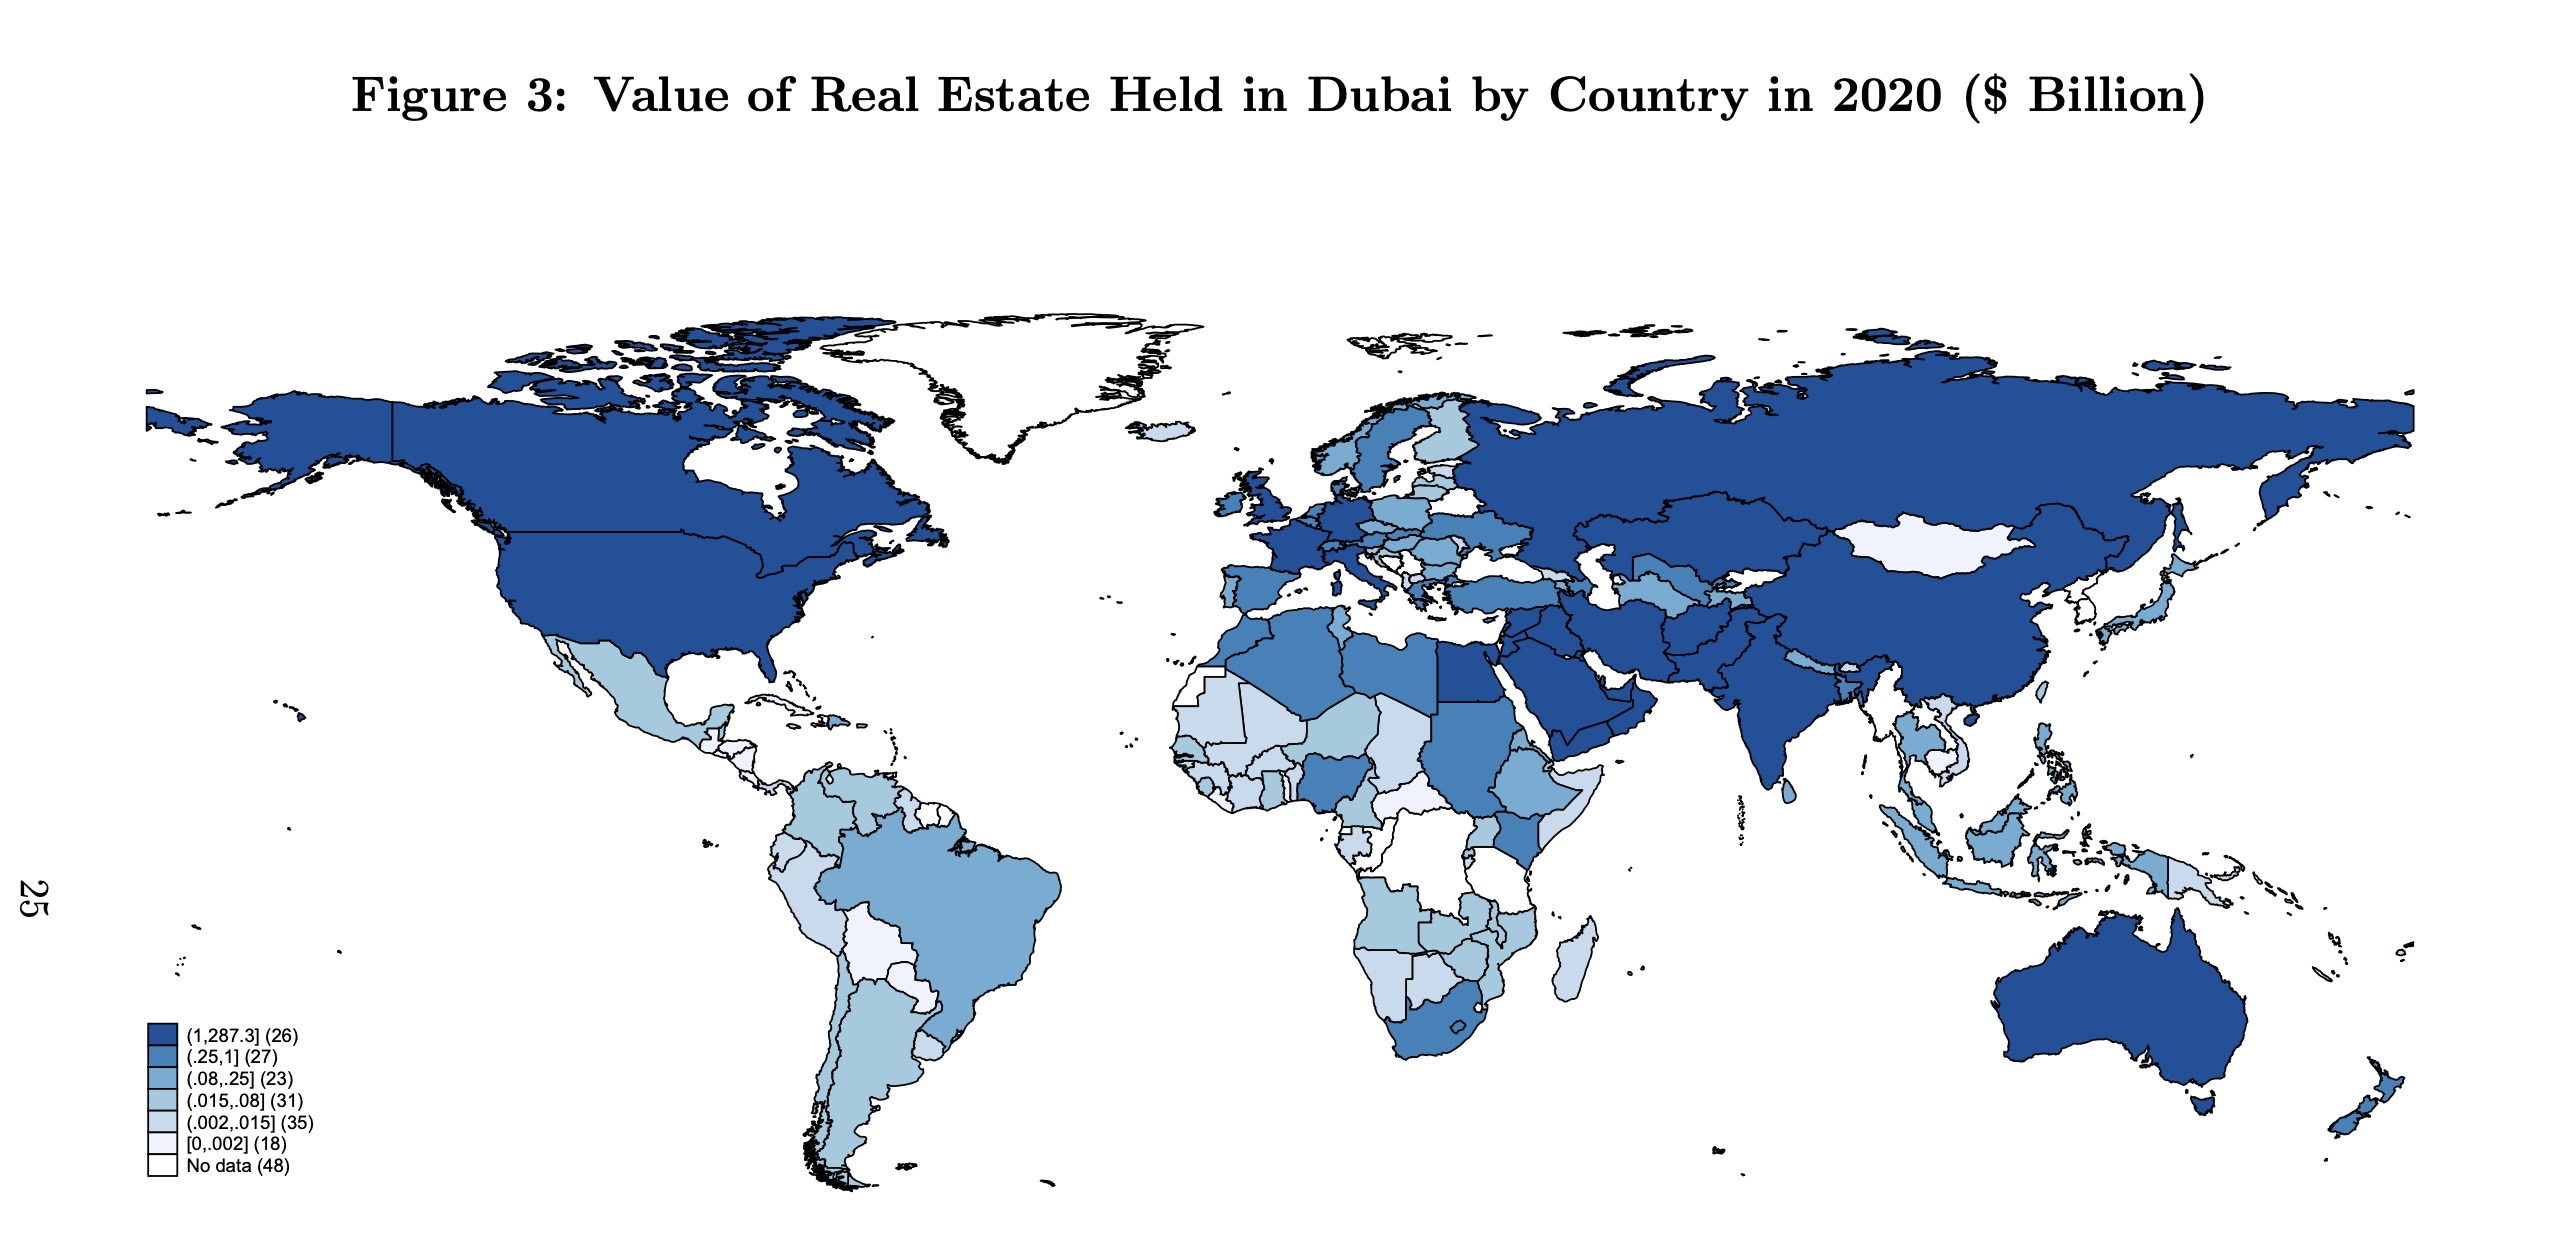

In [34]:
print('reference: 1)https://www.taxobservatory.eu//www-site/uploads/2022/05/APZO2022-6.pdf')
Image('/Users/onionofthefield/Desktop/Im222.jpg')

So, as we see, if we have some data and know how to work with it, we can get even more data, if we want to. And then even more data. We can search again and again, but all these times we find some data and analyse it, there is one tiny question that popes up every single time (good that it does, actually). And so, this question in form of a suggestion is only one notice here that I want *you* to get as a conclusion and message from this presentation (and me):

# <b> Be careful of who you trust.<b>

I mean, 
Sourses.
*Datasets.*
Tools.
*Their creators.*



# Finaly final ✨ Thanks for attention!

Text(0.5, 1.0, '2024, most popular areas')

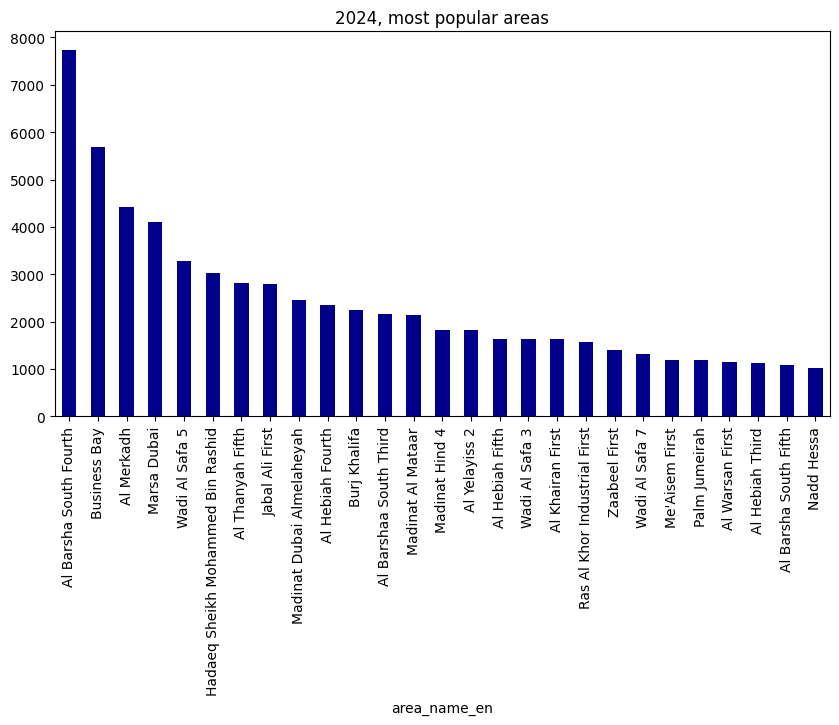

In [214]:
df_2024 = dubai_data[dubai_data['year'] == 2024]
areas_c = df_2024['area_name_en'].value_counts()
filtered_areas_c = areas_c[areas_c > 1000]
filtered_areas_c.plot(kind='bar', color='darkblue')
plt.title('2024, most popular areas')

Text(0.5, 1.0, '2023, most popular areas')

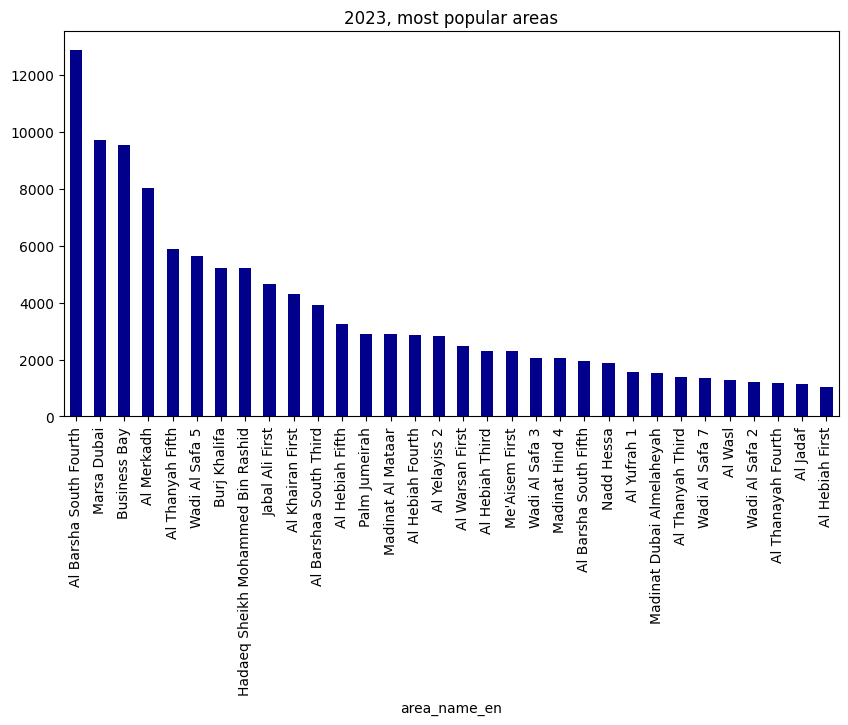

In [215]:
df_2024 = dubai_data[dubai_data['year'] == 2023]
areas_c = df_2024['area_name_en'].value_counts()
filtered_areas_c = areas_c[areas_c > 1000]
filtered_areas_c.plot(kind='bar', color='darkblue')
plt.title('2023, most popular areas')

Text(0.5, 1.0, '2010, most popular areas')

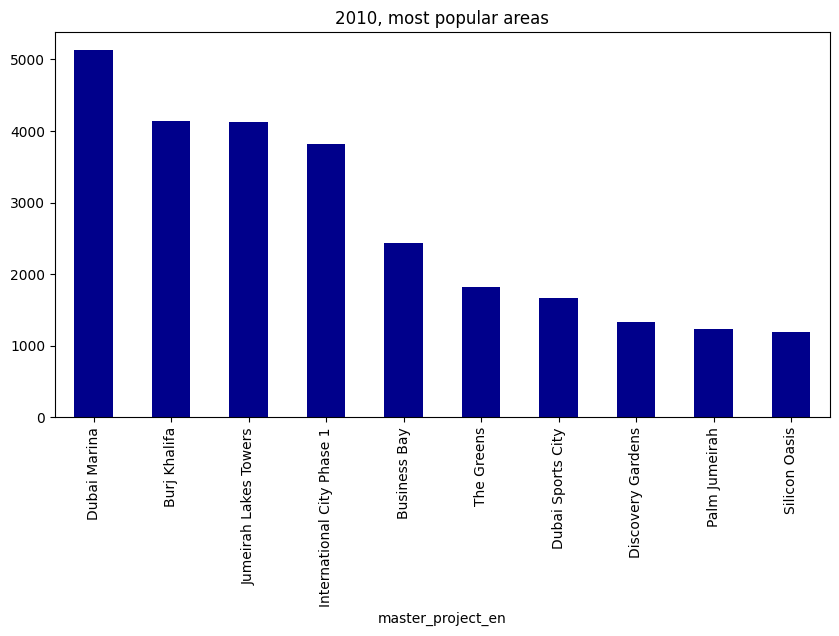

In [268]:
df_2024 = dubai_data[dubai_data['year'] == 2010]
areas_c = df_2024['master_project_en'].value_counts()
filtered_areas_c = areas_c[areas_c > 1000]
filtered_areas_c.plot(kind='bar', color='darkblue')
plt.title('2010, most popular areas')

Text(0.5, 1.0, '2008, most popular areas')

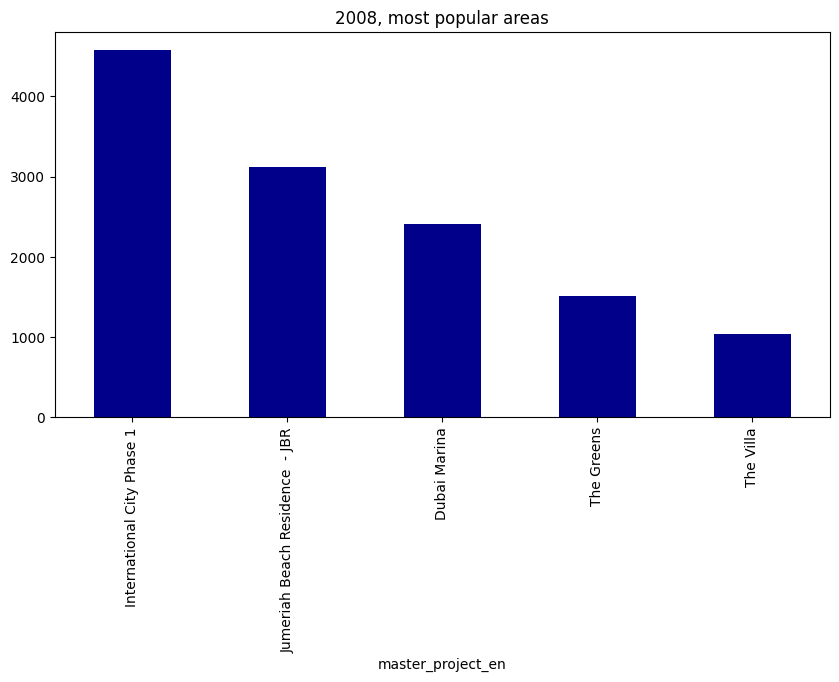

In [266]:
df_2024 = dubai_data[dubai_data['year'] == 2008]
areas_c = df_2024['master_project_en'].value_counts()
filtered_areas_c = areas_c[areas_c > 1000]
filtered_areas_c.plot(kind='bar', color='darkblue')
plt.title('2008, most popular areas')

?

In [ ]:
import geopandas as gp
import gdal
gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
gdf = gp.read_file('/Users/onionofthefield/Desktop/dubaigeojson.SHP')
gdf.plot(edgecolor='darkblue', cmap='0rRd', legend=True)
